## BBM 409 - Programming Assignment 3

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Insert personal information (Sezin, Yavuz, 2200356050)

## 1. Implementing a CNN from Scratch (40 points)

### 1.1. Introduction
* Brief overview of the task.
* Answer the questions like, What are the main components of a CNN architecture?, Why we use this in image classification?, etc.
* Description of the dataset used for classification.

Overview of the Task
The task focused on implementing and comparing different deep learning approaches for image classification. Specifically, we explored designing a CNN model from scratch, fine-tuning a pre-trained ResNet18 model, and fine-tuning a pre-trained MobileNetV2 model. The objective was to classify images from the Animal-10 dataset and evaluate the performance of these models in terms of accuracy, precision, recall, F1-score, and other metrics. Through this process, we analyzed the strengths and weaknesses of training from scratch versus transfer learning, gaining insights into practical considerations when choosing between these approaches.

 Main Components of a CNN Architecture:
A CNN (Convolutional Neural Network) is designed specifically for image-related tasks and consists of several key components:

Convolutional Layers: These layers extract important features from images by applying convolutional operations. They help detect patterns such as edges, textures, and more complex shapes as the network deepens.

Activation Functions (ReLU): After the convolutional operation, ReLU is applied to introduce non-linearity, enabling the network to learn complex relationships in the data.

Pooling Layers: Pooling layers, like MaxPooling, reduce the spatial dimensions of feature maps, lowering computational complexity while retaining essential features.

Fully Connected Layers: These layers take the extracted features and connect them to the output classes, mapping the learned features to probabilities or logits.

Dropout: Dropout layers help prevent overfitting by randomly deactivating neurons during training, making the network more robust.

Softmax Layer: This layer is used in classification tasks to normalize the output of the network into probabilities for each class.

These components work together to process raw image data into class predictions efficiently, making CNNs a popular choice for image classification tasks.


CNNs are highly effective for image classification tasks due to their specialized architecture. They are capable of automatically extracting and learning hierarchical features, which range from simple edges to complex patterns. The parameter-sharing property of convolutional layers reduces the total number of trainable parameters, making CNNs more computationally efficient compared to fully connected networks. Pooling layers introduce translation invariance, ensuring robustness to small shifts in the input images. Additionally, CNNs provide a flexible framework that can adapt to a variety of image datasets and consistently achieve high accuracy. Their ability to generalize well, combined with scalability to deep architectures, makes CNNs indispensable in modern computer vision.

the Dataset
The dataset used for this task is Animal-10, which consists of images of 10 different animal classes: dogs, cats, elephants, butterflies, and more. Each class contains 3000 images for training, 750 images for validation, and 750 images for testing. Images were resized to 256x256 pixels and normalized using the mean and standard deviation of ImageNet to ensure compatibility with pre-trained models. To improve model robustness, data augmentation techniques such as random horizontal flipping and rotation were applied during training.

The dataset presents challenges such as class imbalance, inter-class similarity (e.g., between cats and dogs), and variations in image quality, lighting, and perspective. These factors make the Animal-10 dataset a realistic benchmark for testing the performance of deep learning models in image classification tasks. By addressing these challenges, the task allowed for a comprehensive evaluation of the models and their ability to generalize to unseen data.

### 1.2. Data Loading and Preprocessing (3 points)

In [ ]:
## Import necessary libraries
!pip install split-folders

In [ ]:

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from google.colab import drive
import pandas as pd
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os
import splitfolders
from sklearn.model_selection import train_test_split
import shutil
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
## Load the dataset using PyTorch's data loading utilities
## Apply necessary preprocessing such as resizing and normalization
## Divide the dataset into training, validation, and testing subsets



"""
# Unmount and remount the drive
drive.flush_and_unmount()
print("Drive unmounted.")

drive.mount('/content/drive', force_remount=True)
print("Drive remounted.")

# Step 1: Set the directory path
data_dir = "/content/drive/MyDrive/Colab Notebooks/pa3_subset_animal"  # Replace with your actual path
print(os.listdir(data_dir))

"""

# Transformation for the training dataset with data augmentation
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),            # Randomly flip images horizontally
    transforms.RandomRotation(degrees=15),             # Randomly rotate images by up to 15 degrees
    transforms.RandomResizedCrop(size=(256, 256)),      # Randomly crop and resize to 256x256
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Random color jitter
    transforms.ToTensor(),                              # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406],    # Normalize using ImageNet mean and std
                         std=[0.229, 0.224, 0.225])
])

# Transformation for validation and testing datasets (no augmentation)
val_test_transform = transforms.Compose([
    transforms.Resize((256, 256)),                      # Resize images to 256x256
    transforms.ToTensor(),                              # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406],    # Normalize using ImageNet mean and std
                         std=[0.229, 0.224, 0.225])
])

"""
# Step 3: Ensure balanced splitting
output_dir = "/content/drive/MyDrive/Colab Notebooks/balanced_split"
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")
test_dir = os.path.join(output_dir, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split the dataset class-wise into 3000 train, 750 val, and 750 test images
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    # Get all images in the class directory
    images = os.listdir(class_dir)
    images = [os.path.join(class_dir, img) for img in images]

    # Balanced split: 300 train, 75 val, 75 test per class
    train_imgs, temp_imgs = train_test_split(images, train_size=300, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, train_size=75, random_state=42)

    # Create class-specific directories in train, val, and test folders
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Copy images to their respective directories
    for img_path in train_imgs:
        shutil.copy(img_path, os.path.join(train_dir, class_name))
    for img_path in val_imgs:
        shutil.copy(img_path, os.path.join(val_dir, class_name))
    for img_path in test_imgs:
        shutil.copy(img_path, os.path.join(test_dir, class_name))

print("Balanced dataset split completed!") """

# Mount Google Drive (this step is unavoidable to access your files)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the directory paths (already pre-split)
train_dir = "/content/drive/MyDrive/Colab Notebooks/balanced_split/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/balanced_split/val"
test_dir = "/content/drive/MyDrive/Colab Notebooks/balanced_split/test"


# Step 4: Load train, validation, and test datasets using ImageFolder
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=val_test_transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=val_test_transform)

# DataLoader settings
batch_size = 32  # Adjust batch size based on your system's GPU memory
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,        # Shuffle for training
    num_workers=4,       # Parallel data loading
    pin_memory=True,     # Faster transfer to GPU
    prefetch_factor=2    # Pre-fetch batches to minimize waiting time
)
val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,       # No shuffling for validation
    num_workers=4,
    pin_memory=True,
    prefetch_factor=2
)
test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,       # No shuffling for testing
    num_workers=4,
    pin_memory=True,
    prefetch_factor=2
)

# Verify the dataset and DataLoader outputs
print(f"Classes: {train_dataset.classes}")
print(f"Number of training images: {len(train_dataset)}")
print(f"Number of validation images: {len(val_dataset)}")
print(f"Number of test images: {len(test_dataset)}")

# Iterate through one batch to verify DataLoader functionality
for images, labels in train_loader:
    print(f"Batch image shape: {images.shape}")  # Should be (batch_size, 3, 256, 256)
    print(f"Batch labels: {labels}")
    break






Mounted at /content/drive
Classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Number of training images: 3000
Number of validation images: 750
Number of test images: 750
Batch image shape: torch.Size([32, 3, 256, 256])
Batch labels: tensor([6, 3, 8, 1, 0, 0, 7, 0, 2, 1, 9, 7, 5, 5, 9, 5, 9, 3, 2, 9, 5, 3, 3, 7,
        2, 0, 4, 9, 7, 4, 0, 3])


### 1.3. Define your CNN architecture (7 points)
* Explain the reason behind your architecture.
* Explain your choice of activation functions.

It has an architecture that is well-thought-out to process image data for classification efficiently, using the strengths of Convolutional Neural Networks. This architecture starts with five convolutional layers, each with increased feature channels in a progressive manner (32, 64, 128, 256, 512) to capture hierarchical features. Lower layers are specializing in simple patterns such as edges and textures, while higher layers extract features that become more abstract and complex, like shapes and parts of objects. In order to manage computational complexity and most importantly, to extract only the most relevant spatial features, MaxPooling layers are thrown in after most convolutional layers, reducing the feature maps' spatial dimensions by half:
(256×256 => 128×128). This ensures that the network efficiently condenses information without overwhelming computational resources. A notable choice is skipping MaxPooling after the third convolutional layer, which retains more spatial details at this stage to capture mid-level features before further downsampling.

The three fully-connected layers are placed after the convolutional layers to combine the extracted spatial features into a high-level representation for classification. The first fully connected layer reduces the high-dimensional flattened feature vector (
512×16×16) to 2048 neurons, followed by a second layer refining this down to 1024 neurons. The final fully connected layer maps these learned features to the number of classes for output. This avoid abrupt transformations by gradually reducing the dimensionality and allowing the network to learn relationships between features in a subtile way.

ReLU is used as the activation function for all the layers except the last one, introducing non-linearity in the network without suffering from the vanishing gradient problem that earlier activation functions like Sigmoid and Tanh had. ReLU is computationally efficient and causes sparse activation of neurons, which makes it suitable for deep networks. The last layer doesn't use any activation function because the network outputs logits directly; these are then processed by CrossEntropyLoss during training. This will avoid explicit usage of Softmax and prevents numerical instability that might happen.

Overall, this architecture strikes a balance between feature extraction, computational efficiency, and model capacity. The network is designed to generalize well to complex datasets while avoiding overfitting by progressively reducing spatial dimensions and refining features through convolutional and fully connected layers. Accuracy and efficiency are well ensured by the deliberate use of activation functions, pooling layers, and a structured reduction of feature dimensions, making it quite fit for image classification tasks.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):

    #Constructor
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()

        # 1. Convolutional Layer + ReLU + Max Pooling
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)  # Output: 32x256x256
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # Output: 32x128x128

        # 2. Convolutional Layer + ReLU + Max Pooling
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)  # Output: 64x128x128
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # Output: 64x64x64

        # 3. Convolutional Layer + ReLU
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)  # Output: 128x64x64

        # 4. Convolutional Layer + ReLU + Max Pooling
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)  # Output: 256x64x64
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)  # Output: 256x32x32

        # 5. Convolutional Layer + ReLU + Max Pooling
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)  # Output: 512x32x32
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)  # Output: 512x16x16

        # Fully Connected Layers
        self.fc1 = nn.Linear(512 * 16 * 16, 2048)  # First fully connected layer
        self.dropout1 = nn.Dropout(p=0.5)          # Dropout after the first FC layer

        self.fc2 = nn.Linear(2048, num_classes)    # Second fully connected layer

    def forward(self, x):
        # Pass through the convolutional layers with ReLU and pooling
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        x = F.relu(self.conv3(x))

        x = F.relu(self.conv4(x))
        x = self.pool4(x)

        x = F.relu(self.conv5(x))
        x = self.pool5(x)

        # Flatten the output from the convolutional layers
        x = torch.flatten(x, 1)

        #  fully connected layers with Dropout
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)

        return x

### 1.4 Prepare the model for training (3 points)
* Explain your choice of loss functions and optimization algorithms.

In [ ]:
## Define appropriate loss function for multi-class classification (e.g., cross-entropy loss)
!pip install torchsummary
from torchsummary import summary
num_classes = 10
model = CNN(num_classes=num_classes)

criterion = nn.CrossEntropyLoss()

#model is on the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device) # Move model to the correct device before calling summary

summary(model, (3, 256, 256))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 256, 256]             896
         MaxPool2d-2         [-1, 32, 128, 128]               0
            Conv2d-3         [-1, 64, 128, 128]          18,496
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5          [-1, 128, 64, 64]          73,856
            Conv2d-6          [-1, 256, 64, 64]         295,168
         MaxPool2d-7          [-1, 256, 32, 32]               0
            Conv2d-8          [-1, 512, 32, 32]       1,180,160
         MaxPool2d-9          [-1, 512, 16, 16]               0
           Linear-10                 [-1, 2048]     268,437,504
          Dropout-11                 [-1, 2048]               0
           Linear-12                   [-1, 10]          20,490
Total params: 270,026,570
Trainable params: 270,026,570
Non-trainable params: 0
-----------------------

In [ ]:
## Choose an optimizer (SGD or Adam) and set its parameters (e.g., learning rate)
optimizer = optim.Adam(
    model.parameters(),
    lr=0.0001,
    weight_decay=1e-3    # L2 regularization
)

### 1.5 Train and Validate the CNN model (9 points)

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import shutil
from tqdm import tqdm
from torch.cuda.amp import autocast, GradScaler
import matplotlib.pyplot as plt

num_epochs = 150

# Lists to store metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print("-" * 30)

    # Training
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss /= len(train_loader.dataset)
    train_accuracy = 100.0 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%")

    # Validation
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in tqdm(val_loader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_accuracy = 100.0 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Save the model
torch.save(model.state_dict(), '/content/drive/MyDrive/CNN_model.pth')


Epoch 1/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.21it/s]


Training Loss: 2.2712, Training Accuracy: 13.83%


100%|██████████| 24/24 [00:02<00:00,  9.24it/s]


Validation Loss: 2.1562, Validation Accuracy: 21.47%
Epoch 2/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.24it/s]


Training Loss: 2.1868, Training Accuracy: 20.27%


100%|██████████| 24/24 [00:02<00:00, 10.01it/s]


Validation Loss: 2.0569, Validation Accuracy: 27.47%
Epoch 3/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


Training Loss: 2.1251, Training Accuracy: 22.27%


100%|██████████| 24/24 [00:02<00:00, 10.20it/s]


Validation Loss: 1.9982, Validation Accuracy: 29.20%
Epoch 4/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 2.0986, Training Accuracy: 24.93%


100%|██████████| 24/24 [00:02<00:00, 10.08it/s]


Validation Loss: 1.9223, Validation Accuracy: 31.87%
Epoch 5/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.24it/s]


Training Loss: 2.0521, Training Accuracy: 26.13%


100%|██████████| 24/24 [00:02<00:00, 10.14it/s]


Validation Loss: 1.9022, Validation Accuracy: 31.73%
Epoch 6/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


Training Loss: 2.0170, Training Accuracy: 27.73%


100%|██████████| 24/24 [00:02<00:00, 10.05it/s]


Validation Loss: 1.8572, Validation Accuracy: 35.47%
Epoch 7/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.20it/s]


Training Loss: 1.9920, Training Accuracy: 28.27%


100%|██████████| 24/24 [00:02<00:00,  9.41it/s]


Validation Loss: 1.8458, Validation Accuracy: 33.73%
Epoch 8/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


Training Loss: 1.9664, Training Accuracy: 29.40%


100%|██████████| 24/24 [00:02<00:00,  9.74it/s]


Validation Loss: 1.7987, Validation Accuracy: 35.20%
Epoch 9/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


Training Loss: 1.9158, Training Accuracy: 31.20%


100%|██████████| 24/24 [00:02<00:00, 10.07it/s]


Validation Loss: 1.6948, Validation Accuracy: 38.53%
Epoch 10/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


Training Loss: 1.8908, Training Accuracy: 32.97%


100%|██████████| 24/24 [00:02<00:00, 10.09it/s]


Validation Loss: 1.6363, Validation Accuracy: 42.00%
Epoch 11/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.24it/s]


Training Loss: 1.8929, Training Accuracy: 32.83%


100%|██████████| 24/24 [00:02<00:00, 10.16it/s]


Validation Loss: 1.7073, Validation Accuracy: 38.00%
Epoch 12/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


Training Loss: 1.8635, Training Accuracy: 32.50%


100%|██████████| 24/24 [00:02<00:00, 10.02it/s]


Validation Loss: 1.7056, Validation Accuracy: 36.67%
Epoch 13/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


Training Loss: 1.8438, Training Accuracy: 34.07%


100%|██████████| 24/24 [00:02<00:00,  9.83it/s]


Validation Loss: 1.6522, Validation Accuracy: 40.40%
Epoch 14/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.8449, Training Accuracy: 34.57%


100%|██████████| 24/24 [00:02<00:00,  9.50it/s]


Validation Loss: 1.6372, Validation Accuracy: 42.00%
Epoch 15/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.8037, Training Accuracy: 37.33%


100%|██████████| 24/24 [00:02<00:00,  9.49it/s]


Validation Loss: 1.6095, Validation Accuracy: 42.80%
Epoch 16/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.24it/s]


Training Loss: 1.7855, Training Accuracy: 37.37%


100%|██████████| 24/24 [00:02<00:00, 10.09it/s]


Validation Loss: 1.6258, Validation Accuracy: 43.20%
Epoch 17/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


Training Loss: 1.7935, Training Accuracy: 35.90%


100%|██████████| 24/24 [00:02<00:00, 10.21it/s]


Validation Loss: 1.5876, Validation Accuracy: 44.93%
Epoch 18/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.7777, Training Accuracy: 37.27%


100%|██████████| 24/24 [00:02<00:00,  9.97it/s]


Validation Loss: 1.6136, Validation Accuracy: 43.47%
Epoch 19/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.7320, Training Accuracy: 38.63%


100%|██████████| 24/24 [00:02<00:00, 10.34it/s]


Validation Loss: 1.5043, Validation Accuracy: 47.07%
Epoch 20/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.7316, Training Accuracy: 38.83%


100%|██████████| 24/24 [00:02<00:00,  9.66it/s]


Validation Loss: 1.5654, Validation Accuracy: 45.60%
Epoch 21/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.7313, Training Accuracy: 38.57%


100%|██████████| 24/24 [00:02<00:00,  9.42it/s]


Validation Loss: 1.4912, Validation Accuracy: 46.53%
Epoch 22/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.15it/s]


Training Loss: 1.7066, Training Accuracy: 40.50%


100%|██████████| 24/24 [00:02<00:00,  9.89it/s]


Validation Loss: 1.5232, Validation Accuracy: 45.33%
Epoch 23/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.7158, Training Accuracy: 40.13%


100%|██████████| 24/24 [00:02<00:00, 10.24it/s]


Validation Loss: 1.5397, Validation Accuracy: 46.00%
Epoch 24/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.6934, Training Accuracy: 40.07%


100%|██████████| 24/24 [00:02<00:00, 10.10it/s]


Validation Loss: 1.5085, Validation Accuracy: 46.13%
Epoch 25/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.6908, Training Accuracy: 40.43%


100%|██████████| 24/24 [00:02<00:00, 10.20it/s]


Validation Loss: 1.4885, Validation Accuracy: 47.47%
Epoch 26/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.6599, Training Accuracy: 40.73%


100%|██████████| 24/24 [00:02<00:00, 10.05it/s]


Validation Loss: 1.5607, Validation Accuracy: 44.13%
Epoch 27/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.19it/s]


Training Loss: 1.6713, Training Accuracy: 41.23%


100%|██████████| 24/24 [00:02<00:00, 10.03it/s]


Validation Loss: 1.4896, Validation Accuracy: 46.00%
Epoch 28/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.6571, Training Accuracy: 40.50%


100%|██████████| 24/24 [00:02<00:00,  9.35it/s]


Validation Loss: 1.4942, Validation Accuracy: 46.80%
Epoch 29/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.6340, Training Accuracy: 43.00%


100%|██████████| 24/24 [00:02<00:00,  9.82it/s]


Validation Loss: 1.4503, Validation Accuracy: 49.33%
Epoch 30/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


Training Loss: 1.6142, Training Accuracy: 42.70%


100%|██████████| 24/24 [00:02<00:00, 10.13it/s]


Validation Loss: 1.4969, Validation Accuracy: 49.20%
Epoch 31/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.6291, Training Accuracy: 42.13%


100%|██████████| 24/24 [00:02<00:00, 10.32it/s]


Validation Loss: 1.4469, Validation Accuracy: 47.87%
Epoch 32/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.5866, Training Accuracy: 43.77%


100%|██████████| 24/24 [00:02<00:00, 10.41it/s]


Validation Loss: 1.4134, Validation Accuracy: 49.87%
Epoch 33/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.6127, Training Accuracy: 42.20%


100%|██████████| 24/24 [00:02<00:00, 10.15it/s]


Validation Loss: 1.4050, Validation Accuracy: 50.27%
Epoch 34/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.5836, Training Accuracy: 43.73%


100%|██████████| 24/24 [00:02<00:00,  9.50it/s]


Validation Loss: 1.3935, Validation Accuracy: 52.40%
Epoch 35/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.5707, Training Accuracy: 43.43%


100%|██████████| 24/24 [00:02<00:00,  9.81it/s]


Validation Loss: 1.4903, Validation Accuracy: 46.53%
Epoch 36/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.5753, Training Accuracy: 44.23%


100%|██████████| 24/24 [00:02<00:00,  9.88it/s]


Validation Loss: 1.3638, Validation Accuracy: 52.93%
Epoch 37/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.5351, Training Accuracy: 45.53%


100%|██████████| 24/24 [00:02<00:00, 10.20it/s]


Validation Loss: 1.3545, Validation Accuracy: 50.53%
Epoch 38/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.5391, Training Accuracy: 46.03%


100%|██████████| 24/24 [00:02<00:00, 10.04it/s]


Validation Loss: 1.3731, Validation Accuracy: 51.73%
Epoch 39/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


Training Loss: 1.5479, Training Accuracy: 44.53%


100%|██████████| 24/24 [00:02<00:00, 10.00it/s]


Validation Loss: 1.4181, Validation Accuracy: 48.27%
Epoch 40/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.5427, Training Accuracy: 45.07%


100%|██████████| 24/24 [00:02<00:00,  9.47it/s]


Validation Loss: 1.3570, Validation Accuracy: 52.13%
Epoch 41/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.5001, Training Accuracy: 46.70%


100%|██████████| 24/24 [00:02<00:00,  9.78it/s]


Validation Loss: 1.3739, Validation Accuracy: 51.47%
Epoch 42/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.23it/s]


Training Loss: 1.4952, Training Accuracy: 47.53%


100%|██████████| 24/24 [00:02<00:00, 10.34it/s]


Validation Loss: 1.4550, Validation Accuracy: 47.87%
Epoch 43/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.5188, Training Accuracy: 46.33%


100%|██████████| 24/24 [00:02<00:00, 10.28it/s]


Validation Loss: 1.3555, Validation Accuracy: 52.53%
Epoch 44/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.5333, Training Accuracy: 44.77%


100%|██████████| 24/24 [00:02<00:00,  9.96it/s]


Validation Loss: 1.3370, Validation Accuracy: 53.73%
Epoch 45/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.4889, Training Accuracy: 47.00%


100%|██████████| 24/24 [00:02<00:00, 10.07it/s]


Validation Loss: 1.3603, Validation Accuracy: 53.20%
Epoch 46/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.5117, Training Accuracy: 47.80%


100%|██████████| 24/24 [00:02<00:00,  9.59it/s]


Validation Loss: 1.3237, Validation Accuracy: 52.40%
Epoch 47/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.4450, Training Accuracy: 49.77%


100%|██████████| 24/24 [00:02<00:00,  9.44it/s]


Validation Loss: 1.2992, Validation Accuracy: 53.73%
Epoch 48/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.27it/s]


Training Loss: 1.4999, Training Accuracy: 47.17%


100%|██████████| 24/24 [00:02<00:00, 10.13it/s]


Validation Loss: 1.2908, Validation Accuracy: 55.33%
Epoch 49/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.4639, Training Accuracy: 48.33%


100%|██████████| 24/24 [00:02<00:00, 10.13it/s]


Validation Loss: 1.3112, Validation Accuracy: 54.27%
Epoch 50/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.4539, Training Accuracy: 50.13%


100%|██████████| 24/24 [00:02<00:00, 10.29it/s]


Validation Loss: 1.3064, Validation Accuracy: 53.73%
Epoch 51/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.27it/s]


Training Loss: 1.4582, Training Accuracy: 48.93%


100%|██████████| 24/24 [00:02<00:00, 10.38it/s]


Validation Loss: 1.3714, Validation Accuracy: 52.80%
Epoch 52/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.4633, Training Accuracy: 49.13%


100%|██████████| 24/24 [00:02<00:00,  9.96it/s]


Validation Loss: 1.3597, Validation Accuracy: 53.20%
Epoch 53/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.4400, Training Accuracy: 50.33%


100%|██████████| 24/24 [00:02<00:00,  9.39it/s]


Validation Loss: 1.2677, Validation Accuracy: 53.47%
Epoch 54/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.4137, Training Accuracy: 50.53%


100%|██████████| 24/24 [00:02<00:00,  9.72it/s]


Validation Loss: 1.2794, Validation Accuracy: 54.13%
Epoch 55/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.4359, Training Accuracy: 48.90%


100%|██████████| 24/24 [00:02<00:00, 10.21it/s]


Validation Loss: 1.2719, Validation Accuracy: 54.53%
Epoch 56/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.4054, Training Accuracy: 49.60%


100%|██████████| 24/24 [00:02<00:00,  9.97it/s]


Validation Loss: 1.2298, Validation Accuracy: 54.67%
Epoch 57/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.4092, Training Accuracy: 51.20%


100%|██████████| 24/24 [00:02<00:00, 10.15it/s]


Validation Loss: 1.2896, Validation Accuracy: 53.87%
Epoch 58/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.28it/s]


Training Loss: 1.4261, Training Accuracy: 48.77%


100%|██████████| 24/24 [00:02<00:00, 10.12it/s]


Validation Loss: 1.2684, Validation Accuracy: 53.33%
Epoch 59/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.4119, Training Accuracy: 50.30%


100%|██████████| 24/24 [00:02<00:00,  9.37it/s]


Validation Loss: 1.2195, Validation Accuracy: 55.87%
Epoch 60/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.28it/s]


Training Loss: 1.3614, Training Accuracy: 51.73%


100%|██████████| 24/24 [00:02<00:00,  9.66it/s]


Validation Loss: 1.2732, Validation Accuracy: 54.80%
Epoch 61/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.4126, Training Accuracy: 50.63%


100%|██████████| 24/24 [00:02<00:00, 10.25it/s]


Validation Loss: 1.2554, Validation Accuracy: 55.47%
Epoch 62/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


Training Loss: 1.3849, Training Accuracy: 52.33%


100%|██████████| 24/24 [00:02<00:00, 10.39it/s]


Validation Loss: 1.2796, Validation Accuracy: 54.00%
Epoch 63/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.3773, Training Accuracy: 52.20%


100%|██████████| 24/24 [00:02<00:00, 10.24it/s]


Validation Loss: 1.2989, Validation Accuracy: 54.00%
Epoch 64/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.3505, Training Accuracy: 52.57%


100%|██████████| 24/24 [00:02<00:00, 10.46it/s]


Validation Loss: 1.3297, Validation Accuracy: 52.67%
Epoch 65/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.22it/s]


Training Loss: 1.3631, Training Accuracy: 52.67%


100%|██████████| 24/24 [00:02<00:00,  9.95it/s]


Validation Loss: 1.2532, Validation Accuracy: 57.33%
Epoch 66/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.20it/s]


Training Loss: 1.3640, Training Accuracy: 52.73%


100%|██████████| 24/24 [00:02<00:00,  9.46it/s]


Validation Loss: 1.2055, Validation Accuracy: 56.67%
Epoch 67/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.3257, Training Accuracy: 54.20%


100%|██████████| 24/24 [00:02<00:00,  9.63it/s]


Validation Loss: 1.1902, Validation Accuracy: 56.40%
Epoch 68/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.3110, Training Accuracy: 53.87%


100%|██████████| 24/24 [00:02<00:00, 10.43it/s]


Validation Loss: 1.1846, Validation Accuracy: 57.73%
Epoch 69/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.3151, Training Accuracy: 53.87%


100%|██████████| 24/24 [00:02<00:00, 10.33it/s]


Validation Loss: 1.2156, Validation Accuracy: 56.13%
Epoch 70/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.3083, Training Accuracy: 54.83%


100%|██████████| 24/24 [00:02<00:00,  9.34it/s]


Validation Loss: 1.1786, Validation Accuracy: 56.80%
Epoch 71/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.3369, Training Accuracy: 53.63%


100%|██████████| 24/24 [00:02<00:00,  9.92it/s]


Validation Loss: 1.1585, Validation Accuracy: 58.93%
Epoch 72/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.3165, Training Accuracy: 53.40%


100%|██████████| 24/24 [00:02<00:00, 10.22it/s]


Validation Loss: 1.1875, Validation Accuracy: 57.07%
Epoch 73/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.3059, Training Accuracy: 55.03%


100%|██████████| 24/24 [00:02<00:00,  9.49it/s]


Validation Loss: 1.1808, Validation Accuracy: 57.33%
Epoch 74/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.2905, Training Accuracy: 55.70%


100%|██████████| 24/24 [00:02<00:00,  9.37it/s]


Validation Loss: 1.3051, Validation Accuracy: 53.07%
Epoch 75/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


Training Loss: 1.3038, Training Accuracy: 54.63%


100%|██████████| 24/24 [00:02<00:00, 10.12it/s]


Validation Loss: 1.2161, Validation Accuracy: 59.20%
Epoch 76/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.27it/s]


Training Loss: 1.2943, Training Accuracy: 53.83%


100%|██████████| 24/24 [00:02<00:00,  9.92it/s]


Validation Loss: 1.1698, Validation Accuracy: 59.07%
Epoch 77/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.2663, Training Accuracy: 56.27%


100%|██████████| 24/24 [00:02<00:00, 10.22it/s]


Validation Loss: 1.2567, Validation Accuracy: 55.73%
Epoch 78/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.20it/s]


Training Loss: 1.2894, Training Accuracy: 54.03%


100%|██████████| 24/24 [00:02<00:00, 10.13it/s]


Validation Loss: 1.1308, Validation Accuracy: 59.60%
Epoch 79/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.2880, Training Accuracy: 53.90%


100%|██████████| 24/24 [00:02<00:00,  9.26it/s]


Validation Loss: 1.1746, Validation Accuracy: 57.60%
Epoch 80/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.28it/s]


Training Loss: 1.2994, Training Accuracy: 54.83%


100%|██████████| 24/24 [00:02<00:00,  9.63it/s]


Validation Loss: 1.1173, Validation Accuracy: 60.40%
Epoch 81/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.2863, Training Accuracy: 56.13%


100%|██████████| 24/24 [00:02<00:00,  9.96it/s]


Validation Loss: 1.1305, Validation Accuracy: 60.53%
Epoch 82/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.2729, Training Accuracy: 55.80%


100%|██████████| 24/24 [00:02<00:00, 10.09it/s]


Validation Loss: 1.1340, Validation Accuracy: 60.13%
Epoch 83/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.27it/s]


Training Loss: 1.2569, Training Accuracy: 56.53%


100%|██████████| 24/24 [00:02<00:00, 10.22it/s]


Validation Loss: 1.1981, Validation Accuracy: 59.87%
Epoch 84/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.28it/s]


Training Loss: 1.2631, Training Accuracy: 56.97%


100%|██████████| 24/24 [00:02<00:00, 10.28it/s]


Validation Loss: 1.1283, Validation Accuracy: 59.73%
Epoch 85/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.29it/s]


Training Loss: 1.2642, Training Accuracy: 56.33%


100%|██████████| 24/24 [00:02<00:00,  9.50it/s]


Validation Loss: 1.2680, Validation Accuracy: 55.07%
Epoch 86/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.28it/s]


Training Loss: 1.2321, Training Accuracy: 56.37%


100%|██████████| 24/24 [00:02<00:00,  9.77it/s]


Validation Loss: 1.1539, Validation Accuracy: 57.87%
Epoch 87/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.2439, Training Accuracy: 56.27%


100%|██████████| 24/24 [00:02<00:00, 10.13it/s]


Validation Loss: 1.1297, Validation Accuracy: 59.47%
Epoch 88/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.27it/s]


Training Loss: 1.2473, Training Accuracy: 56.83%


100%|██████████| 24/24 [00:02<00:00, 10.16it/s]


Validation Loss: 1.2830, Validation Accuracy: 54.27%
Epoch 89/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.28it/s]


Training Loss: 1.2408, Training Accuracy: 57.53%


100%|██████████| 24/24 [00:02<00:00, 10.48it/s]


Validation Loss: 1.0938, Validation Accuracy: 61.20%
Epoch 90/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.1884, Training Accuracy: 58.47%


100%|██████████| 24/24 [00:02<00:00, 10.02it/s]


Validation Loss: 1.1936, Validation Accuracy: 58.67%
Epoch 91/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.27it/s]


Training Loss: 1.2103, Training Accuracy: 57.87%


100%|██████████| 24/24 [00:02<00:00,  9.50it/s]


Validation Loss: 1.2136, Validation Accuracy: 55.87%
Epoch 92/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.29it/s]


Training Loss: 1.2192, Training Accuracy: 57.30%


100%|██████████| 24/24 [00:02<00:00,  9.71it/s]


Validation Loss: 1.1788, Validation Accuracy: 58.80%
Epoch 93/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.2224, Training Accuracy: 58.40%


100%|██████████| 24/24 [00:02<00:00, 10.35it/s]


Validation Loss: 1.0992, Validation Accuracy: 59.20%
Epoch 94/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.27it/s]


Training Loss: 1.2168, Training Accuracy: 57.40%


100%|██████████| 24/24 [00:02<00:00, 10.40it/s]


Validation Loss: 1.1194, Validation Accuracy: 60.93%
Epoch 95/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.1915, Training Accuracy: 57.93%


100%|██████████| 24/24 [00:02<00:00, 10.22it/s]


Validation Loss: 1.1592, Validation Accuracy: 59.07%
Epoch 96/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.1997, Training Accuracy: 57.80%


100%|██████████| 24/24 [00:02<00:00, 10.15it/s]


Validation Loss: 1.2322, Validation Accuracy: 56.53%
Epoch 97/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


Training Loss: 1.2018, Training Accuracy: 58.77%


100%|██████████| 24/24 [00:02<00:00,  9.69it/s]


Validation Loss: 1.0983, Validation Accuracy: 59.73%
Epoch 98/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.28it/s]


Training Loss: 1.1761, Training Accuracy: 59.80%


100%|██████████| 24/24 [00:02<00:00,  9.67it/s]


Validation Loss: 1.1242, Validation Accuracy: 61.60%
Epoch 99/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.1784, Training Accuracy: 59.17%


100%|██████████| 24/24 [00:02<00:00,  9.96it/s]


Validation Loss: 1.1462, Validation Accuracy: 58.40%
Epoch 100/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.19it/s]


Training Loss: 1.1961, Training Accuracy: 58.23%


100%|██████████| 24/24 [00:02<00:00,  9.93it/s]


Validation Loss: 1.1931, Validation Accuracy: 58.13%
Epoch 101/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.1449, Training Accuracy: 61.27%


100%|██████████| 24/24 [00:02<00:00, 10.20it/s]


Validation Loss: 1.1011, Validation Accuracy: 60.93%
Epoch 102/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.23it/s]


Training Loss: 1.1529, Training Accuracy: 60.83%


100%|██████████| 24/24 [00:02<00:00, 10.13it/s]


Validation Loss: 1.0830, Validation Accuracy: 61.87%
Epoch 103/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.1692, Training Accuracy: 58.87%


100%|██████████| 24/24 [00:02<00:00, 10.31it/s]


Validation Loss: 1.1499, Validation Accuracy: 60.80%
Epoch 104/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.21it/s]


Training Loss: 1.1765, Training Accuracy: 58.93%


100%|██████████| 24/24 [00:02<00:00, 10.00it/s]


Validation Loss: 1.1049, Validation Accuracy: 60.40%
Epoch 105/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.1339, Training Accuracy: 61.00%


100%|██████████| 24/24 [00:02<00:00,  9.49it/s]


Validation Loss: 1.0607, Validation Accuracy: 61.60%
Epoch 106/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.1643, Training Accuracy: 59.30%


100%|██████████| 24/24 [00:02<00:00,  9.93it/s]


Validation Loss: 1.1475, Validation Accuracy: 58.53%
Epoch 107/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.1493, Training Accuracy: 60.10%


100%|██████████| 24/24 [00:02<00:00, 10.35it/s]


Validation Loss: 1.0725, Validation Accuracy: 62.00%
Epoch 108/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.28it/s]


Training Loss: 1.1389, Training Accuracy: 60.73%


100%|██████████| 24/24 [00:02<00:00, 10.24it/s]


Validation Loss: 1.0958, Validation Accuracy: 60.80%
Epoch 109/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.1302, Training Accuracy: 60.43%


100%|██████████| 24/24 [00:02<00:00, 10.28it/s]


Validation Loss: 1.0822, Validation Accuracy: 62.00%
Epoch 110/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.28it/s]


Training Loss: 1.1161, Training Accuracy: 61.03%


100%|██████████| 24/24 [00:02<00:00, 10.42it/s]


Validation Loss: 1.1410, Validation Accuracy: 60.13%
Epoch 111/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.28it/s]


Training Loss: 1.1105, Training Accuracy: 60.87%


100%|██████████| 24/24 [00:02<00:00,  9.68it/s]


Validation Loss: 1.1468, Validation Accuracy: 59.60%
Epoch 112/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.1026, Training Accuracy: 61.87%


100%|██████████| 24/24 [00:02<00:00,  9.41it/s]


Validation Loss: 1.1973, Validation Accuracy: 57.73%
Epoch 113/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.1135, Training Accuracy: 63.27%


100%|██████████| 24/24 [00:02<00:00,  9.98it/s]


Validation Loss: 1.0737, Validation Accuracy: 59.60%
Epoch 114/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.1049, Training Accuracy: 61.00%


100%|██████████| 24/24 [00:02<00:00, 10.11it/s]


Validation Loss: 1.1268, Validation Accuracy: 60.40%
Epoch 115/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.27it/s]


Training Loss: 1.1063, Training Accuracy: 61.73%


100%|██████████| 24/24 [00:02<00:00, 10.31it/s]


Validation Loss: 1.1265, Validation Accuracy: 60.80%
Epoch 116/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.27it/s]


Training Loss: 1.1120, Training Accuracy: 61.77%


100%|██████████| 24/24 [00:02<00:00, 10.23it/s]


Validation Loss: 1.0585, Validation Accuracy: 61.87%
Epoch 117/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


Training Loss: 1.1100, Training Accuracy: 62.23%


100%|██████████| 24/24 [00:02<00:00,  9.62it/s]


Validation Loss: 1.0792, Validation Accuracy: 58.40%
Epoch 118/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.13it/s]


Training Loss: 1.0722, Training Accuracy: 61.97%


100%|██████████| 24/24 [00:02<00:00,  9.56it/s]


Validation Loss: 1.1343, Validation Accuracy: 59.60%
Epoch 119/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.28it/s]


Training Loss: 1.0929, Training Accuracy: 62.30%


100%|██████████| 24/24 [00:02<00:00, 10.01it/s]


Validation Loss: 1.1446, Validation Accuracy: 59.07%
Epoch 120/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.27it/s]


Training Loss: 1.1000, Training Accuracy: 62.17%


100%|██████████| 24/24 [00:02<00:00, 10.18it/s]


Validation Loss: 1.0986, Validation Accuracy: 59.60%
Epoch 121/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


Training Loss: 1.0971, Training Accuracy: 61.80%


100%|██████████| 24/24 [00:02<00:00, 10.27it/s]


Validation Loss: 1.0385, Validation Accuracy: 64.13%
Epoch 122/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.0975, Training Accuracy: 61.70%


100%|██████████| 24/24 [00:02<00:00, 10.07it/s]


Validation Loss: 1.0769, Validation Accuracy: 61.60%
Epoch 123/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.0922, Training Accuracy: 62.20%


100%|██████████| 24/24 [00:02<00:00,  9.95it/s]


Validation Loss: 1.0481, Validation Accuracy: 63.60%
Epoch 124/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.0893, Training Accuracy: 62.47%


100%|██████████| 24/24 [00:02<00:00,  9.40it/s]


Validation Loss: 1.0832, Validation Accuracy: 62.00%
Epoch 125/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.28it/s]


Training Loss: 1.0850, Training Accuracy: 61.97%


100%|██████████| 24/24 [00:02<00:00,  9.57it/s]


Validation Loss: 1.0823, Validation Accuracy: 63.20%
Epoch 126/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.0551, Training Accuracy: 62.93%


100%|██████████| 24/24 [00:02<00:00, 10.34it/s]


Validation Loss: 1.0024, Validation Accuracy: 65.20%
Epoch 127/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.0663, Training Accuracy: 63.17%


100%|██████████| 24/24 [00:02<00:00, 10.20it/s]


Validation Loss: 1.0328, Validation Accuracy: 63.87%
Epoch 128/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.0628, Training Accuracy: 63.00%


100%|██████████| 24/24 [00:02<00:00, 10.00it/s]


Validation Loss: 1.0732, Validation Accuracy: 61.60%
Epoch 129/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.0610, Training Accuracy: 62.90%


100%|██████████| 24/24 [00:02<00:00, 10.10it/s]


Validation Loss: 1.1218, Validation Accuracy: 61.20%
Epoch 130/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.0542, Training Accuracy: 63.83%


100%|██████████| 24/24 [00:02<00:00,  9.56it/s]


Validation Loss: 1.1111, Validation Accuracy: 60.40%
Epoch 131/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.27it/s]


Training Loss: 1.0446, Training Accuracy: 63.60%


100%|██████████| 24/24 [00:02<00:00,  9.57it/s]


Validation Loss: 1.1574, Validation Accuracy: 60.80%
Epoch 132/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.0526, Training Accuracy: 62.77%


100%|██████████| 24/24 [00:02<00:00,  9.91it/s]


Validation Loss: 1.0715, Validation Accuracy: 61.07%
Epoch 133/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.0454, Training Accuracy: 62.67%


100%|██████████| 24/24 [00:02<00:00, 10.06it/s]


Validation Loss: 1.0228, Validation Accuracy: 62.93%
Epoch 134/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.28it/s]


Training Loss: 1.0432, Training Accuracy: 62.93%


100%|██████████| 24/24 [00:02<00:00, 10.06it/s]


Validation Loss: 1.0293, Validation Accuracy: 62.67%
Epoch 135/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.0399, Training Accuracy: 64.10%


100%|██████████| 24/24 [00:02<00:00, 10.02it/s]


Validation Loss: 1.0553, Validation Accuracy: 62.80%
Epoch 136/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.22it/s]


Training Loss: 1.0632, Training Accuracy: 64.03%


100%|██████████| 24/24 [00:02<00:00, 10.32it/s]


Validation Loss: 1.1187, Validation Accuracy: 61.07%
Epoch 137/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.0419, Training Accuracy: 64.10%


100%|██████████| 24/24 [00:02<00:00,  9.60it/s]


Validation Loss: 1.0149, Validation Accuracy: 63.87%
Epoch 138/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.28it/s]


Training Loss: 1.0218, Training Accuracy: 64.40%


100%|██████████| 24/24 [00:02<00:00,  9.84it/s]


Validation Loss: 1.0572, Validation Accuracy: 62.40%
Epoch 139/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


Training Loss: 1.0201, Training Accuracy: 65.20%


100%|██████████| 24/24 [00:02<00:00, 10.52it/s]


Validation Loss: 1.1463, Validation Accuracy: 61.47%
Epoch 140/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.27it/s]


Training Loss: 1.0314, Training Accuracy: 65.00%


100%|██████████| 24/24 [00:02<00:00, 10.34it/s]


Validation Loss: 1.0314, Validation Accuracy: 63.47%
Epoch 141/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 0.9896, Training Accuracy: 65.90%


100%|██████████| 24/24 [00:02<00:00, 10.16it/s]


Validation Loss: 1.0218, Validation Accuracy: 63.60%
Epoch 142/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.27it/s]


Training Loss: 1.0183, Training Accuracy: 64.40%


100%|██████████| 24/24 [00:02<00:00, 10.11it/s]


Validation Loss: 1.0348, Validation Accuracy: 62.93%
Epoch 143/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.0169, Training Accuracy: 64.37%


100%|██████████| 24/24 [00:02<00:00,  9.48it/s]


Validation Loss: 0.9775, Validation Accuracy: 65.87%
Epoch 144/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.28it/s]


Training Loss: 0.9794, Training Accuracy: 66.80%


100%|██████████| 24/24 [00:02<00:00,  9.65it/s]


Validation Loss: 1.0176, Validation Accuracy: 63.47%
Epoch 145/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


Training Loss: 1.0082, Training Accuracy: 65.30%


100%|██████████| 24/24 [00:02<00:00, 10.02it/s]


Validation Loss: 1.1221, Validation Accuracy: 60.27%
Epoch 146/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.13it/s]


Training Loss: 1.0398, Training Accuracy: 64.63%


100%|██████████| 24/24 [00:02<00:00,  9.99it/s]


Validation Loss: 0.9937, Validation Accuracy: 64.67%
Epoch 147/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.28it/s]


Training Loss: 1.0251, Training Accuracy: 64.80%


100%|██████████| 24/24 [00:02<00:00,  9.69it/s]


Validation Loss: 1.0273, Validation Accuracy: 62.40%
Epoch 148/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.28it/s]


Training Loss: 0.9987, Training Accuracy: 66.20%


100%|██████████| 24/24 [00:02<00:00, 10.39it/s]


Validation Loss: 1.1041, Validation Accuracy: 63.07%
Epoch 149/150
------------------------------


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


Training Loss: 1.0265, Training Accuracy: 64.67%


100%|██████████| 24/24 [00:02<00:00,  9.99it/s]


Validation Loss: 1.0840, Validation Accuracy: 61.47%
Epoch 150/150
------------------------------


100%|██████████| 94/94 [00:21<00:00,  4.27it/s]


Training Loss: 0.9751, Training Accuracy: 66.77%


100%|██████████| 24/24 [00:02<00:00,  9.53it/s]


Validation Loss: 1.0092, Validation Accuracy: 64.40%


In [ ]:
## You can conduct experiments with different hyperparameters to get the best performing model, considering you will be uploading your best model into Kaggle for compitation :)

Training Hyperparameters:

>>Training Loss: 2.3039, Training Accuracy: 9.43%

>>Validation Loss: 2.3027, Validation Accuracy: 10.00%

Optimizer Type: Adam Optimizer.

Learning Rate (lr): 0.001

Number of Epochs30

Batch Size:32

Loss Function:CrossEntropyLoss for multi-class classification tasks.

Dropout : (0.5)

3 fully connected layer



Training Hyperparameters:

>>Training Loss: 0.0001, Training Accuracy: 100.00%

>>Validation Loss: 4.3032, Validation Accuracy: 40.80%


Optimizer Type: SGD Optimizer.

Learning Rate (lr): 0.01

Number of Epochs :30

Batch Size:32

Loss Function:CrossEntropyLoss for multi-class classification tasks.

Dropout : --

2 fully connected layer



Training Hyperparameters:

>>Training Loss: 0.0001, Training Accuracy:98.20%

>>Validation Loss: 4.3032, Validation Accuracy: 38.27%


Optimizer Type: Adam Optimizer.

Learning Rate (lr): 0.001

Number of Epochs :150

Batch Size:32

Loss Function:CrossEntropyLoss for multi-class classification tasks.

Dropout : --

2 fully connected layer

Training Hyperparameters:

>>Training Loss: 0.0001, Training Accuracy:97.50%


>>Validation Loss: 4.3032, Validation Accuracy:46.80%


Optimizer Type: Adam Optimizer.

Learning Rate (lr): 0.0001

Number of Epochs :30

Batch Size:32

Loss Function:CrossEntropyLoss for multi-class classification tasks.

Dropout : --

2 fully connected layer



Training Hyperparameters:

>>Training Loss: 0.0001, Training Accuracy:66.77%

>>Validation Loss: 1.0092, Validation Accuracy: 64.40%




Optimizer Type: Adam Optimizer.

Learning Rate (lr): 0.0001

Number of Epochs :150


Batch Size:32

Loss Function:CrossEntropyLoss for multi-class classification tasks.

Dropout : --

2 fully connected layer





Learning Rate: The learning rate is a critical hyperparameter in training deep learning models as it determines how much the weights are updated during each optimization step. For the experiments, I chose:

A learning rate of 0.001 for Adam optimizer: This value is a widely accepted default for Adam due to its ability to adaptively adjust the learning rate for each parameter during training. It balances convergence speed and stability.
A learning rate of 0.01 for SGD optimizer: A slightly higher learning rate for SGD was selected as it does not adaptively adjust the learning rate like Adam, and starting with a higher value accelerates convergence in the initial stages.
Batch Size: The batch size of 32 was chosen for all experiments as it strikes a balance between computational efficiency and model performance:

Smaller batch sizes (like 16) can introduce more noise in gradient estimation, leading to less stable training.
Larger batch sizes (like 64 or 128) might lead to overfitting, as the model might converge to sharper minima that generalize poorly.
Batch size 32 ensures effective memory utilization while providing sufficient gradient stability for better optimization.

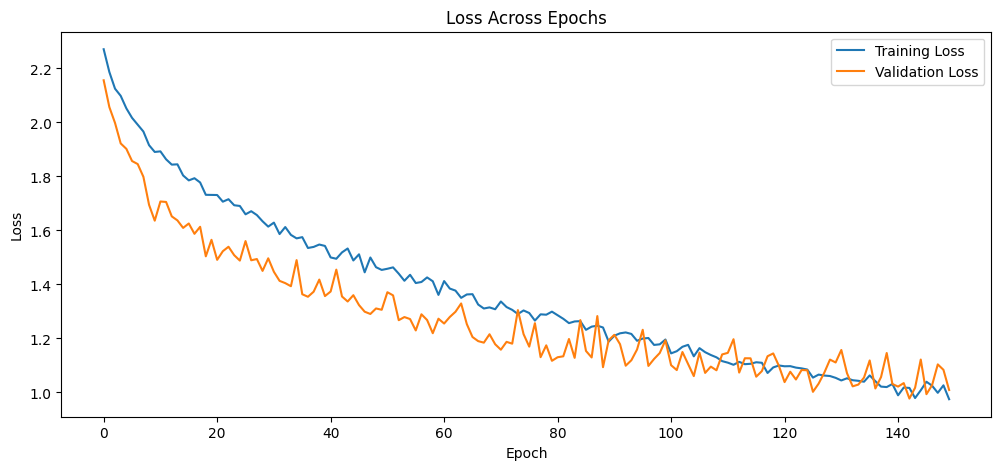

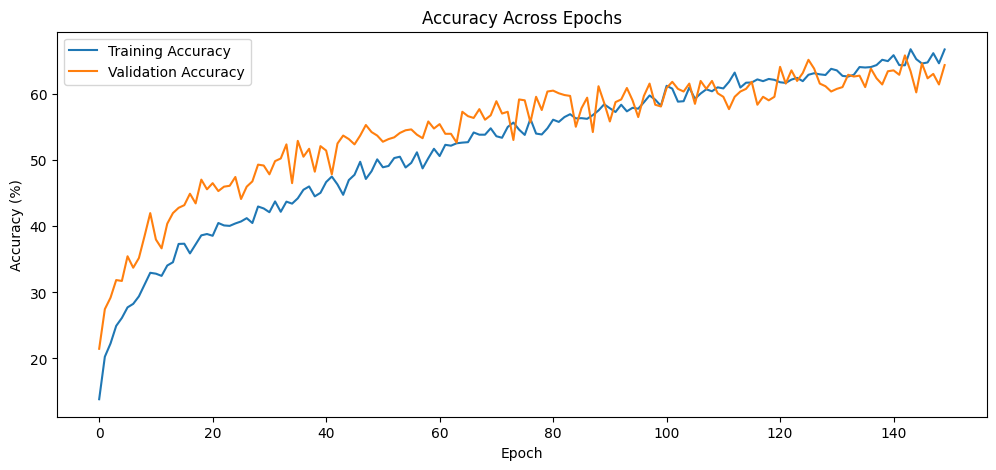

In [ ]:
## Select your best model with respect to validation accuracy
## Visualize the accuracy and loss change of the best performing model across training and validation datasets.
# Plot training and validation loss
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot metrics
plt.figure(figsize=(12, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


### 1.6 Evaluate the trained model on the test set (6 points)

Test Accuracy: 64.93%
Classification Report:

              precision    recall  f1-score   support

        cane       0.50      0.36      0.42        75
     cavallo       0.60      0.55      0.57        75
    elefante       0.76      0.63      0.69        75
    farfalla       0.73      0.85      0.79        75
     gallina       0.84      0.61      0.71        75
       gatto       0.62      0.67      0.64        75
       mucca       0.45      0.77      0.57        75
      pecora       0.65      0.57      0.61        75
       ragno       0.76      0.76      0.76        75
  scoiattolo       0.75      0.72      0.73        75

    accuracy                           0.65       750
   macro avg       0.67      0.65      0.65       750
weighted avg       0.67      0.65      0.65       750



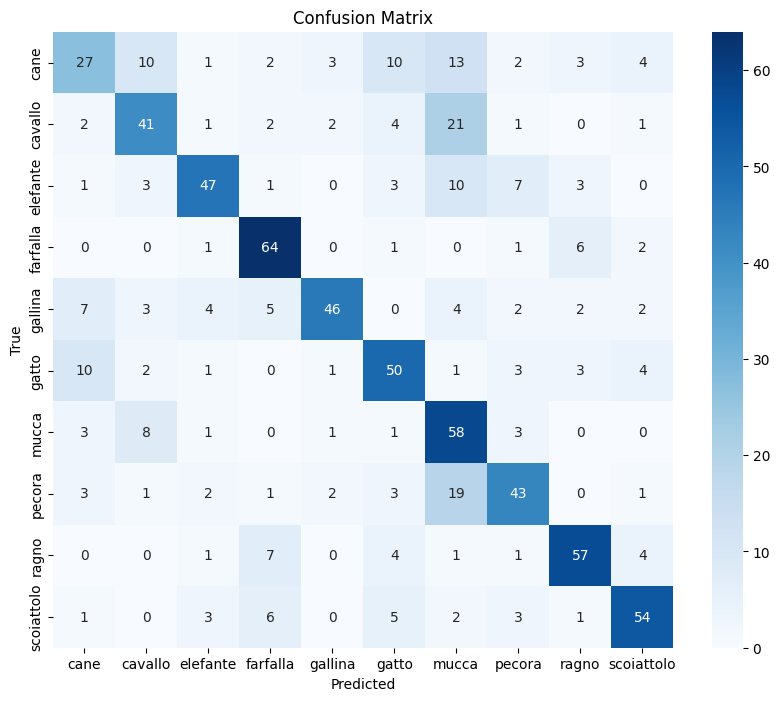

In [ ]:
## Test the trained model on the test set to evaluate its performance
## Compute metrics such as accuracy, precision, recall, and F1-score
## Visualize confusion matrix to understand the model's behavior across different classes
## Comment on the results

import torch
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

model.eval()

# Test the model
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute accuracy
accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Classification Report
class_names = test_dataset.classes
report = classification_report(all_labels, all_preds, target_names=class_names)
print("Classification Report:\n")
print(report)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### 1.7 Conclusion and interpretation (7 points)
* Summarize the performance of the model on the test set
* Discuss any challenges encountered during training and potential areas for improvement
* Reflect on the overall effectiveness of the chosen CNN architecture and training approach

The CNN model performed moderately well on the test set, achieving an accuracy of 64.93%. While the overall performance was balanced with a macro-average F1-score of 65%, there were notable disparities between classes. For instance, the model classified "Farfalla" (butterfly) and "Ragno" (spider) effectively, achieving F1-scores of 0.79 and 0.76, respectively. However, it struggled with classes like "Mucca" (cow) and "Cane" (dog), which had lower F1-scores of 0.57 and 0.42. This suggests that the model was unable to effectively learn distinguishing features for some classes, possibly due to the dataset's complexity or limitations in feature extraction.

Several challenges were encountered during training. Overfitting was a significant issue, likely because the dataset, consisting of 4500 images, was relatively small for the complexity of the CNN architecture. The architecture, which included five convolutional layers and a fully connected layer, may have been too complex, leading to a large number of trainable parameters relative to the available data. Although data augmentation was used to improve generalization, it may not have been sufficient to address these challenges fully. Additionally, fine-tuning hyperparameters such as the learning rate, dropout rate, and batch size could have further improved performance.

To improve the model, several steps could be taken. Enhanced data augmentation techniques, such as random zoom, affine transformations, or adding Gaussian noise, could increase dataset diversity and reduce overfitting. Simplifying the model architecture by reducing the number of layers or filters would better align the model complexity with the dataset size. Alternatively, using a pre-trained model through transfer learning (e.g., ResNet or MobileNet) could significantly improve performance by leveraging features learned from larger datasets like ImageNet. Regularization methods, such as increasing the dropout rate or adding weight decay, could also help prevent overfitting. Additionally, strategies such as learning rate scheduling and cross-validation could improve the model's robustness during training.

In summary, the CNN architecture and training approach provided a good starting point, but improvements in data augmentation, model complexity, and training strategies are necessary to achieve better performance and reduce overfitting. These adjustments would enhance the model's ability to generalize and provide more accurate predictions.


### 1.8 Kaggle Test Result (5 points)
* Put your Kaggle test result for your CNN model here and comment on it.
* You will get a score between 0-1 and your percentage (e.g. 0.1, 0.3, 0.6, 0.85) of accuracy will be multiplied by the highest possible score (5 points) for this part. That will be your grading score.

The CNN model achieved an accuracy of 64.3% on the Kaggle test dataset. This indicates that the model is moderately effective in classifying the test images. While the performance is reasonable, it suggests there is room for improvement, particularly in handling challenging or ambiguous classes.

The result reflects the balance between the complexity of the CNN architecture and the size of the dataset. Overfitting may have played a role in limiting the model's generalization, as evidenced by some misclassifications in the validation set during training. To improve this score, additional strategies like enhanced data augmentation, fine-tuning of hyperparameters, and leveraging pre-trained models through transfer learning could be explored.



In [ ]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# Custom Dataset for test images
class TestDataset(Dataset):
    def __init__(self, image_paths, transform):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path).convert('RGB')  # Ensure RGB format
        img = self.transform(img)
        return img, os.path.basename(img_path).split('.')[0]  # Return image and its ID

# Create the test dataset and DataLoader
test_dataset = TestDataset(image_paths=sorted_files, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#  Predict class labels for test set images in batches
model = model.to(device)  # Ensure the model is on the correct device
kaggle_preds = []
image_ids = []

with torch.no_grad():
    for images, ids in test_loader:
        images = images.to(device)  # Move images to the GPU
        outputs = model(images)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get predicted class indices
        kaggle_preds.extend(predicted.cpu().numpy())  # Move predictions to CPU and store
        image_ids.extend(ids)  # Store image IDs

#  Map predicted class indices to class labels
predicted_labels = [class_names[pred] for pred in kaggle_preds]

# Save predictions to CSV file
submission = pd.DataFrame({'ID': image_ids, 'Label': predicted_labels})
submission.to_csv('/content/predictions.csv', index=False)
print("Submission file saved as 'predictions.csv'")

# Download
from google.colab import files
files.download('/content/predictions.csv')


Submission file saved as 'predictions.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2. Exploring Transfer Learning with ResNet50 and MobileNet (60 points)

### 2.1. Introduction
* Brief overview of the task.
* Answer the questions like, What is fine-tuning? Why should we do this? Why do we freeze the rest and train only last layers?

### 2.2. Load the pre-trained ResNet18 model (3 points)


In [ ]:
## Utilize torchvision library to load the pre-trained ResNet18 model
## Ensure that the model's architecture matches ResNet18, by checking the model summary.
#Import necessary libraries
from torch import nn
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from  torch import optim
from torchvision import transforms, utils, models

from collections import OrderedDict
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

### 2.3 Modify the ResNet18 model for transfer learning (15 points)

In [ ]:
## Freeze all layers of the ResNet18 model.
## Replace the final fully connected layer with a new FC layer matching the number of classes
## Unfreeze the final FC layer
## Define appropriate loss function and optimizer for training
## Train the modified ResNet18 model on the animal-10 image dataset. (base model)
# Load the pretrained ResNet18 model
resnet18 = models.resnet18(pretrained=True)
print(resnet18)  # View the architecture to identify layers for modification

# Freeze all layers
for param in resnet18.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 10)

# Unfreeze the FC layer
for param in resnet18.fc.parameters():
    param.requires_grad = True





/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 221MB/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
## Define another ResNet18 model
## Freeze all layers of the ResNet18 model.
## Replace the final fully connected layer with a new FC layer matching the number of classes
## Unfreeze the final FC layer
## Unfreeze convolutional layers 3 and 4 of the ResNet18 model and again proceed with training. (second model)

from torchvision import models
import torch.nn as nn

#  Load the pre-trained ResNet18 model
resnet18_v2 = models.resnet18(pretrained=True)

# Freeze all layers
for param in resnet18_v2.parameters():
    param.requires_grad = False

#  Replace the final fully connected layer
num_classes = 10
resnet18_v2.fc = nn.Linear(resnet18_v2.fc.in_features, num_classes)

#  Unfreeze the final FC layer
for param in resnet18_v2.fc.parameters():
    param.requires_grad = True

#  Unfreeze convolutional layers 3 and 4
for name, param in resnet18_v2.named_parameters():
    if "layer3" in name or "layer4" in name:
        param.requires_grad = True

# Move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18_v2 = resnet18_v2.to(device)


In [ ]:
## Define another ResNet18 model
## Replace the final fully connected layer with a new FC layer matching the number of classes proceed with training. (third model)
# Load the pre-trained ResNet18 model
resnet18_v3 = models.resnet18(pretrained=True)

# Replace the final fully connected layer with a new one
num_classes = 10
resnet18_v3.fc = nn.Linear(resnet18_v3.fc.in_features, num_classes)

#  Move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18_v3 = resnet18_v3.to(device)



Model: resnet18_v1 | Epoch 1/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.67it/s]


Training Loss: 1.3826, Training Accuracy: 59.67%


100%|██████████| 24/24 [00:02<00:00,  9.42it/s]


Validation Loss: 0.5080, Validation Accuracy: 91.33%
Model: resnet18_v1 | Epoch 2/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.62it/s]


Training Loss: 0.7606, Training Accuracy: 78.37%


100%|██████████| 24/24 [00:02<00:00, 10.19it/s]


Validation Loss: 0.3189, Validation Accuracy: 94.13%
Model: resnet18_v1 | Epoch 3/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.60it/s]


Training Loss: 0.6513, Training Accuracy: 80.53%


100%|██████████| 24/24 [00:02<00:00, 10.15it/s]


Validation Loss: 0.2537, Validation Accuracy: 94.93%
Model: resnet18_v1 | Epoch 4/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.65it/s]


Training Loss: 0.5912, Training Accuracy: 82.23%


100%|██████████| 24/24 [00:02<00:00, 10.10it/s]


Validation Loss: 0.2244, Validation Accuracy: 94.27%
Model: resnet18_v1 | Epoch 5/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.57it/s]


Training Loss: 0.5432, Training Accuracy: 83.23%


100%|██████████| 24/24 [00:02<00:00,  9.85it/s]


Validation Loss: 0.2073, Validation Accuracy: 94.67%
Model: resnet18_v1 | Epoch 6/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.65it/s]


Training Loss: 0.5223, Training Accuracy: 83.10%


100%|██████████| 24/24 [00:02<00:00,  9.47it/s]


Validation Loss: 0.1906, Validation Accuracy: 94.93%
Model: resnet18_v1 | Epoch 7/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.42it/s]


Training Loss: 0.4978, Training Accuracy: 83.93%


100%|██████████| 24/24 [00:02<00:00, 10.26it/s]


Validation Loss: 0.1944, Validation Accuracy: 94.53%
Model: resnet18_v1 | Epoch 8/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.84it/s]


Training Loss: 0.4909, Training Accuracy: 83.83%


100%|██████████| 24/24 [00:02<00:00, 10.34it/s]


Validation Loss: 0.1783, Validation Accuracy: 95.20%
Model: resnet18_v1 | Epoch 9/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.84it/s]


Training Loss: 0.5086, Training Accuracy: 83.70%


100%|██████████| 24/24 [00:02<00:00,  9.12it/s]


Validation Loss: 0.1656, Validation Accuracy: 95.47%
Model: resnet18_v1 | Epoch 10/30
------------------------------


100%|██████████| 94/94 [00:15<00:00,  6.24it/s]


Training Loss: 0.4828, Training Accuracy: 83.73%


100%|██████████| 24/24 [00:02<00:00,  9.62it/s]


Validation Loss: 0.1601, Validation Accuracy: 95.73%
Model: resnet18_v1 | Epoch 11/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.74it/s]


Training Loss: 0.4717, Training Accuracy: 83.60%


100%|██████████| 24/24 [00:02<00:00, 10.23it/s]


Validation Loss: 0.1702, Validation Accuracy: 95.60%
Model: resnet18_v1 | Epoch 12/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.81it/s]


Training Loss: 0.4693, Training Accuracy: 83.43%


100%|██████████| 24/24 [00:02<00:00, 10.44it/s]


Validation Loss: 0.1684, Validation Accuracy: 94.67%
Model: resnet18_v1 | Epoch 13/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.82it/s]


Training Loss: 0.4812, Training Accuracy: 84.77%


100%|██████████| 24/24 [00:02<00:00, 10.14it/s]


Validation Loss: 0.1667, Validation Accuracy: 94.93%
Model: resnet18_v1 | Epoch 14/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.56it/s]


Training Loss: 0.4463, Training Accuracy: 84.97%


100%|██████████| 24/24 [00:02<00:00, 10.19it/s]


Validation Loss: 0.1676, Validation Accuracy: 94.80%
Model: resnet18_v1 | Epoch 15/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.81it/s]


Training Loss: 0.4725, Training Accuracy: 83.60%


100%|██████████| 24/24 [00:02<00:00,  9.71it/s]


Validation Loss: 0.1491, Validation Accuracy: 95.73%
Model: resnet18_v1 | Epoch 16/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.78it/s]


Training Loss: 0.4706, Training Accuracy: 83.83%


100%|██████████| 24/24 [00:02<00:00, 10.38it/s]


Validation Loss: 0.1664, Validation Accuracy: 94.27%
Model: resnet18_v1 | Epoch 17/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.92it/s]


Training Loss: 0.4271, Training Accuracy: 86.00%


100%|██████████| 24/24 [00:02<00:00, 10.23it/s]


Validation Loss: 0.1650, Validation Accuracy: 94.80%
Model: resnet18_v1 | Epoch 18/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.95it/s]


Training Loss: 0.4384, Training Accuracy: 84.70%


100%|██████████| 24/24 [00:02<00:00, 10.13it/s]


Validation Loss: 0.1483, Validation Accuracy: 95.47%
Model: resnet18_v1 | Epoch 19/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  7.02it/s]


Training Loss: 0.4491, Training Accuracy: 85.33%


100%|██████████| 24/24 [00:02<00:00, 10.40it/s]


Validation Loss: 0.1551, Validation Accuracy: 94.40%
Model: resnet18_v1 | Epoch 20/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  7.02it/s]


Training Loss: 0.4688, Training Accuracy: 84.90%


100%|██████████| 24/24 [00:02<00:00, 10.20it/s]


Validation Loss: 0.1630, Validation Accuracy: 94.53%
Model: resnet18_v1 | Epoch 21/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.96it/s]


Training Loss: 0.4688, Training Accuracy: 84.53%


100%|██████████| 24/24 [00:02<00:00,  9.61it/s]


Validation Loss: 0.1570, Validation Accuracy: 94.67%
Model: resnet18_v1 | Epoch 22/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.99it/s]


Training Loss: 0.4302, Training Accuracy: 85.87%


100%|██████████| 24/24 [00:02<00:00, 10.56it/s]


Validation Loss: 0.1566, Validation Accuracy: 94.00%
Model: resnet18_v1 | Epoch 23/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.95it/s]


Training Loss: 0.4230, Training Accuracy: 85.90%


100%|██████████| 24/24 [00:02<00:00, 10.24it/s]


Validation Loss: 0.1577, Validation Accuracy: 94.53%
Model: resnet18_v1 | Epoch 24/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.90it/s]


Training Loss: 0.4076, Training Accuracy: 85.63%


100%|██████████| 24/24 [00:02<00:00, 10.38it/s]


Validation Loss: 0.1442, Validation Accuracy: 95.07%
Model: resnet18_v1 | Epoch 25/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  7.03it/s]


Training Loss: 0.4425, Training Accuracy: 85.10%


100%|██████████| 24/24 [00:02<00:00, 10.32it/s]


Validation Loss: 0.1583, Validation Accuracy: 95.20%
Model: resnet18_v1 | Epoch 26/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.80it/s]


Training Loss: 0.4287, Training Accuracy: 85.13%


100%|██████████| 24/24 [00:02<00:00,  9.75it/s]


Validation Loss: 0.1587, Validation Accuracy: 94.93%
Model: resnet18_v1 | Epoch 27/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.87it/s]


Training Loss: 0.4389, Training Accuracy: 85.47%


100%|██████████| 24/24 [00:02<00:00,  9.88it/s]


Validation Loss: 0.1686, Validation Accuracy: 94.13%
Model: resnet18_v1 | Epoch 28/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.98it/s]


Training Loss: 0.4167, Training Accuracy: 86.17%


100%|██████████| 24/24 [00:02<00:00, 10.27it/s]


Validation Loss: 0.1709, Validation Accuracy: 94.00%
Model: resnet18_v1 | Epoch 29/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.80it/s]


Training Loss: 0.4217, Training Accuracy: 85.63%


100%|██████████| 24/24 [00:02<00:00, 10.43it/s]


Validation Loss: 0.1490, Validation Accuracy: 95.20%
Model: resnet18_v1 | Epoch 30/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.75it/s]


Training Loss: 0.4065, Training Accuracy: 86.60%


100%|██████████| 24/24 [00:02<00:00, 10.34it/s]


Validation Loss: 0.1543, Validation Accuracy: 94.67%
Model: resnet18_v2 | Epoch 1/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.85it/s]


Training Loss: 0.9318, Training Accuracy: 71.57%


100%|██████████| 24/24 [00:02<00:00, 10.27it/s]


Validation Loss: 0.2797, Validation Accuracy: 91.73%
Model: resnet18_v2 | Epoch 2/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.76it/s]


Training Loss: 0.5296, Training Accuracy: 83.57%


100%|██████████| 24/24 [00:02<00:00,  9.77it/s]


Validation Loss: 0.1974, Validation Accuracy: 94.13%
Model: resnet18_v2 | Epoch 3/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.76it/s]


Training Loss: 0.4382, Training Accuracy: 86.50%


100%|██████████| 24/24 [00:02<00:00, 10.57it/s]


Validation Loss: 0.2110, Validation Accuracy: 94.00%
Model: resnet18_v2 | Epoch 4/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.78it/s]


Training Loss: 0.4066, Training Accuracy: 86.77%


100%|██████████| 24/24 [00:02<00:00, 10.30it/s]


Validation Loss: 0.1905, Validation Accuracy: 94.27%
Model: resnet18_v2 | Epoch 5/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.85it/s]


Training Loss: 0.3517, Training Accuracy: 88.50%


100%|██████████| 24/24 [00:02<00:00, 10.25it/s]


Validation Loss: 0.1888, Validation Accuracy: 95.07%
Model: resnet18_v2 | Epoch 6/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.81it/s]


Training Loss: 0.3345, Training Accuracy: 89.30%


100%|██████████| 24/24 [00:02<00:00, 10.41it/s]


Validation Loss: 0.1535, Validation Accuracy: 95.07%
Model: resnet18_v2 | Epoch 7/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.66it/s]


Training Loss: 0.3247, Training Accuracy: 89.50%


100%|██████████| 24/24 [00:02<00:00,  9.71it/s]


Validation Loss: 0.1490, Validation Accuracy: 95.87%
Model: resnet18_v2 | Epoch 8/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.77it/s]


Training Loss: 0.2867, Training Accuracy: 90.77%


100%|██████████| 24/24 [00:02<00:00, 10.24it/s]


Validation Loss: 0.1580, Validation Accuracy: 94.80%
Model: resnet18_v2 | Epoch 9/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.78it/s]


Training Loss: 0.2923, Training Accuracy: 90.20%


100%|██████████| 24/24 [00:02<00:00, 10.21it/s]


Validation Loss: 0.1526, Validation Accuracy: 95.60%
Model: resnet18_v2 | Epoch 10/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.73it/s]


Training Loss: 0.2782, Training Accuracy: 90.97%


100%|██████████| 24/24 [00:02<00:00, 10.17it/s]


Validation Loss: 0.1431, Validation Accuracy: 96.00%
Model: resnet18_v2 | Epoch 11/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.75it/s]


Training Loss: 0.2867, Training Accuracy: 90.60%


100%|██████████| 24/24 [00:02<00:00,  9.94it/s]


Validation Loss: 0.1801, Validation Accuracy: 94.00%
Model: resnet18_v2 | Epoch 12/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.65it/s]


Training Loss: 0.2707, Training Accuracy: 91.03%


100%|██████████| 24/24 [00:02<00:00,  9.45it/s]


Validation Loss: 0.1633, Validation Accuracy: 94.93%
Model: resnet18_v2 | Epoch 13/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.78it/s]


Training Loss: 0.2704, Training Accuracy: 90.73%


100%|██████████| 24/24 [00:02<00:00, 10.44it/s]


Validation Loss: 0.1839, Validation Accuracy: 94.40%
Model: resnet18_v2 | Epoch 14/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.71it/s]


Training Loss: 0.2343, Training Accuracy: 92.17%


100%|██████████| 24/24 [00:02<00:00, 10.11it/s]


Validation Loss: 0.1903, Validation Accuracy: 93.47%
Model: resnet18_v2 | Epoch 15/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.67it/s]


Training Loss: 0.2238, Training Accuracy: 92.70%


100%|██████████| 24/24 [00:02<00:00, 10.24it/s]


Validation Loss: 0.1821, Validation Accuracy: 94.13%
Model: resnet18_v2 | Epoch 16/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.75it/s]


Training Loss: 0.2313, Training Accuracy: 92.10%


100%|██████████| 24/24 [00:02<00:00, 10.15it/s]


Validation Loss: 0.2005, Validation Accuracy: 94.00%
Model: resnet18_v2 | Epoch 17/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.84it/s]


Training Loss: 0.2527, Training Accuracy: 91.47%


100%|██████████| 24/24 [00:02<00:00,  9.68it/s]


Validation Loss: 0.1798, Validation Accuracy: 94.53%
Model: resnet18_v2 | Epoch 18/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.82it/s]


Training Loss: 0.2237, Training Accuracy: 92.53%


100%|██████████| 24/24 [00:02<00:00, 10.15it/s]


Validation Loss: 0.2015, Validation Accuracy: 94.00%
Model: resnet18_v2 | Epoch 19/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.82it/s]


Training Loss: 0.2446, Training Accuracy: 91.67%


100%|██████████| 24/24 [00:02<00:00, 10.20it/s]


Validation Loss: 0.2121, Validation Accuracy: 93.87%
Model: resnet18_v2 | Epoch 20/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.81it/s]


Training Loss: 0.2178, Training Accuracy: 92.97%


100%|██████████| 24/24 [00:02<00:00, 10.29it/s]


Validation Loss: 0.1785, Validation Accuracy: 94.40%
Model: resnet18_v2 | Epoch 21/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.75it/s]


Training Loss: 0.1985, Training Accuracy: 93.27%


100%|██████████| 24/24 [00:02<00:00, 10.34it/s]


Validation Loss: 0.1741, Validation Accuracy: 94.80%
Model: resnet18_v2 | Epoch 22/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.92it/s]


Training Loss: 0.2240, Training Accuracy: 92.67%


100%|██████████| 24/24 [00:02<00:00,  9.66it/s]


Validation Loss: 0.1619, Validation Accuracy: 95.20%
Model: resnet18_v2 | Epoch 23/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.88it/s]


Training Loss: 0.1947, Training Accuracy: 93.47%


100%|██████████| 24/24 [00:02<00:00, 10.53it/s]


Validation Loss: 0.1743, Validation Accuracy: 94.27%
Model: resnet18_v2 | Epoch 24/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.89it/s]


Training Loss: 0.1937, Training Accuracy: 93.97%


100%|██████████| 24/24 [00:02<00:00, 10.23it/s]


Validation Loss: 0.2129, Validation Accuracy: 92.67%
Model: resnet18_v2 | Epoch 25/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.98it/s]


Training Loss: 0.2075, Training Accuracy: 93.23%


100%|██████████| 24/24 [00:02<00:00, 10.54it/s]


Validation Loss: 0.1661, Validation Accuracy: 94.93%
Model: resnet18_v2 | Epoch 26/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.84it/s]


Training Loss: 0.2099, Training Accuracy: 93.23%


100%|██████████| 24/24 [00:02<00:00, 10.44it/s]


Validation Loss: 0.1711, Validation Accuracy: 94.27%
Model: resnet18_v2 | Epoch 27/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.86it/s]


Training Loss: 0.2037, Training Accuracy: 93.33%


100%|██████████| 24/24 [00:02<00:00, 10.08it/s]


Validation Loss: 0.1659, Validation Accuracy: 94.67%
Model: resnet18_v2 | Epoch 28/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.65it/s]


Training Loss: 0.1975, Training Accuracy: 93.70%


100%|██████████| 24/24 [00:02<00:00,  9.79it/s]


Validation Loss: 0.1792, Validation Accuracy: 93.87%
Model: resnet18_v2 | Epoch 29/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  6.74it/s]


Training Loss: 0.2088, Training Accuracy: 93.03%


100%|██████████| 24/24 [00:02<00:00, 10.38it/s]


Validation Loss: 0.1420, Validation Accuracy: 95.20%
Model: resnet18_v2 | Epoch 30/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.50it/s]


Training Loss: 0.1791, Training Accuracy: 94.03%


100%|██████████| 24/24 [00:02<00:00, 10.40it/s]


Validation Loss: 0.1778, Validation Accuracy: 94.93%
Model: resnet18_v3 | Epoch 1/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.38it/s]


Training Loss: 1.5667, Training Accuracy: 48.60%


100%|██████████| 24/24 [00:02<00:00, 10.20it/s]


Validation Loss: 1.4054, Validation Accuracy: 54.80%
Model: resnet18_v3 | Epoch 2/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.57it/s]


Training Loss: 1.2248, Training Accuracy: 58.67%


100%|██████████| 24/24 [00:02<00:00,  9.42it/s]


Validation Loss: 1.3032, Validation Accuracy: 58.53%
Model: resnet18_v3 | Epoch 3/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.56it/s]


Training Loss: 1.1177, Training Accuracy: 62.63%


100%|██████████| 24/24 [00:02<00:00, 10.24it/s]


Validation Loss: 1.0589, Validation Accuracy: 65.33%
Model: resnet18_v3 | Epoch 4/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.55it/s]


Training Loss: 1.0653, Training Accuracy: 63.67%


100%|██████████| 24/24 [00:02<00:00,  9.90it/s]


Validation Loss: 0.8285, Validation Accuracy: 70.93%
Model: resnet18_v3 | Epoch 5/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.54it/s]


Training Loss: 0.9626, Training Accuracy: 66.53%


100%|██████████| 24/24 [00:02<00:00, 10.36it/s]


Validation Loss: 1.3905, Validation Accuracy: 62.80%
Model: resnet18_v3 | Epoch 6/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.56it/s]


Training Loss: 0.9352, Training Accuracy: 68.30%


100%|██████████| 24/24 [00:02<00:00,  9.34it/s]


Validation Loss: 0.7344, Validation Accuracy: 75.60%
Model: resnet18_v3 | Epoch 7/30
------------------------------


100%|██████████| 94/94 [00:15<00:00,  6.14it/s]


Training Loss: 0.9204, Training Accuracy: 69.23%


100%|██████████| 24/24 [00:02<00:00,  9.50it/s]


Validation Loss: 0.9710, Validation Accuracy: 68.67%
Model: resnet18_v3 | Epoch 8/30
------------------------------


100%|██████████| 94/94 [00:15<00:00,  6.05it/s]


Training Loss: 0.8661, Training Accuracy: 70.93%


100%|██████████| 24/24 [00:02<00:00,  9.91it/s]


Validation Loss: 0.9091, Validation Accuracy: 72.67%
Model: resnet18_v3 | Epoch 9/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.32it/s]


Training Loss: 0.8090, Training Accuracy: 72.97%


100%|██████████| 24/24 [00:02<00:00,  9.62it/s]


Validation Loss: 1.0515, Validation Accuracy: 67.33%
Model: resnet18_v3 | Epoch 10/30
------------------------------


100%|██████████| 94/94 [00:15<00:00,  6.23it/s]


Training Loss: 0.8442, Training Accuracy: 72.57%


100%|██████████| 24/24 [00:02<00:00,  8.89it/s]


Validation Loss: 0.9409, Validation Accuracy: 70.93%
Model: resnet18_v3 | Epoch 11/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.28it/s]


Training Loss: 0.7700, Training Accuracy: 74.73%


100%|██████████| 24/24 [00:02<00:00, 10.23it/s]


Validation Loss: 0.9491, Validation Accuracy: 70.67%
Model: resnet18_v3 | Epoch 12/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.30it/s]


Training Loss: 0.7603, Training Accuracy: 74.73%


100%|██████████| 24/24 [00:02<00:00,  9.79it/s]


Validation Loss: 0.7380, Validation Accuracy: 77.33%
Model: resnet18_v3 | Epoch 13/30
------------------------------


100%|██████████| 94/94 [00:15<00:00,  6.15it/s]


Training Loss: 0.7930, Training Accuracy: 73.00%


100%|██████████| 24/24 [00:02<00:00,  9.11it/s]


Validation Loss: 0.8095, Validation Accuracy: 75.33%
Model: resnet18_v3 | Epoch 14/30
------------------------------


100%|██████████| 94/94 [00:15<00:00,  6.07it/s]


Training Loss: 0.8040, Training Accuracy: 73.40%


100%|██████████| 24/24 [00:02<00:00, 10.11it/s]


Validation Loss: 0.9132, Validation Accuracy: 70.80%
Model: resnet18_v3 | Epoch 15/30
------------------------------


100%|██████████| 94/94 [00:15<00:00,  6.25it/s]


Training Loss: 0.7250, Training Accuracy: 75.50%


100%|██████████| 24/24 [00:02<00:00,  9.56it/s]


Validation Loss: 0.7049, Validation Accuracy: 76.80%
Model: resnet18_v3 | Epoch 16/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.57it/s]


Training Loss: 0.7345, Training Accuracy: 75.00%


100%|██████████| 24/24 [00:02<00:00, 10.28it/s]


Validation Loss: 0.7158, Validation Accuracy: 76.40%
Model: resnet18_v3 | Epoch 17/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.52it/s]


Training Loss: 0.6666, Training Accuracy: 77.40%


100%|██████████| 24/24 [00:02<00:00,  9.66it/s]


Validation Loss: 0.6534, Validation Accuracy: 80.13%
Model: resnet18_v3 | Epoch 18/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.48it/s]


Training Loss: 0.7269, Training Accuracy: 75.33%


100%|██████████| 24/24 [00:02<00:00, 10.38it/s]


Validation Loss: 0.6303, Validation Accuracy: 80.53%
Model: resnet18_v3 | Epoch 19/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.63it/s]


Training Loss: 0.6881, Training Accuracy: 78.03%


100%|██████████| 24/24 [00:02<00:00, 10.26it/s]


Validation Loss: 0.8543, Validation Accuracy: 72.27%
Model: resnet18_v3 | Epoch 20/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.48it/s]


Training Loss: 0.7133, Training Accuracy: 76.20%


100%|██████████| 24/24 [00:02<00:00, 10.36it/s]


Validation Loss: 0.6924, Validation Accuracy: 77.87%
Model: resnet18_v3 | Epoch 21/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.43it/s]


Training Loss: 0.6625, Training Accuracy: 77.87%


100%|██████████| 24/24 [00:02<00:00,  9.50it/s]


Validation Loss: 0.6191, Validation Accuracy: 78.67%
Model: resnet18_v3 | Epoch 22/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.53it/s]


Training Loss: 0.6596, Training Accuracy: 77.97%


100%|██████████| 24/24 [00:02<00:00, 10.12it/s]


Validation Loss: 0.7319, Validation Accuracy: 78.27%
Model: resnet18_v3 | Epoch 23/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.63it/s]


Training Loss: 0.6759, Training Accuracy: 77.80%


100%|██████████| 24/24 [00:02<00:00, 10.24it/s]


Validation Loss: 0.6368, Validation Accuracy: 78.67%
Model: resnet18_v3 | Epoch 24/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.71it/s]


Training Loss: 0.6404, Training Accuracy: 78.67%


100%|██████████| 24/24 [00:02<00:00, 10.28it/s]


Validation Loss: 0.7026, Validation Accuracy: 79.60%
Model: resnet18_v3 | Epoch 25/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.48it/s]


Training Loss: 0.6257, Training Accuracy: 78.60%


100%|██████████| 24/24 [00:02<00:00, 10.24it/s]


Validation Loss: 0.8081, Validation Accuracy: 76.53%
Model: resnet18_v3 | Epoch 26/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.65it/s]


Training Loss: 0.6282, Training Accuracy: 78.90%


100%|██████████| 24/24 [00:02<00:00,  9.73it/s]


Validation Loss: 0.7145, Validation Accuracy: 77.87%
Model: resnet18_v3 | Epoch 27/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.48it/s]


Training Loss: 0.6324, Training Accuracy: 79.00%


100%|██████████| 24/24 [00:02<00:00, 10.36it/s]


Validation Loss: 0.6619, Validation Accuracy: 80.80%
Model: resnet18_v3 | Epoch 28/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.60it/s]


Training Loss: 0.5910, Training Accuracy: 80.40%


100%|██████████| 24/24 [00:02<00:00, 10.70it/s]


Validation Loss: 0.7713, Validation Accuracy: 78.13%
Model: resnet18_v3 | Epoch 29/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.53it/s]


Training Loss: 0.5917, Training Accuracy: 80.77%


100%|██████████| 24/24 [00:02<00:00, 10.54it/s]


Validation Loss: 0.5676, Validation Accuracy: 81.73%
Model: resnet18_v3 | Epoch 30/30
------------------------------


100%|██████████| 94/94 [00:14<00:00,  6.56it/s]


Training Loss: 0.5978, Training Accuracy: 80.60%


100%|██████████| 24/24 [00:02<00:00,  9.67it/s]


Validation Loss: 0.6360, Validation Accuracy: 79.33%


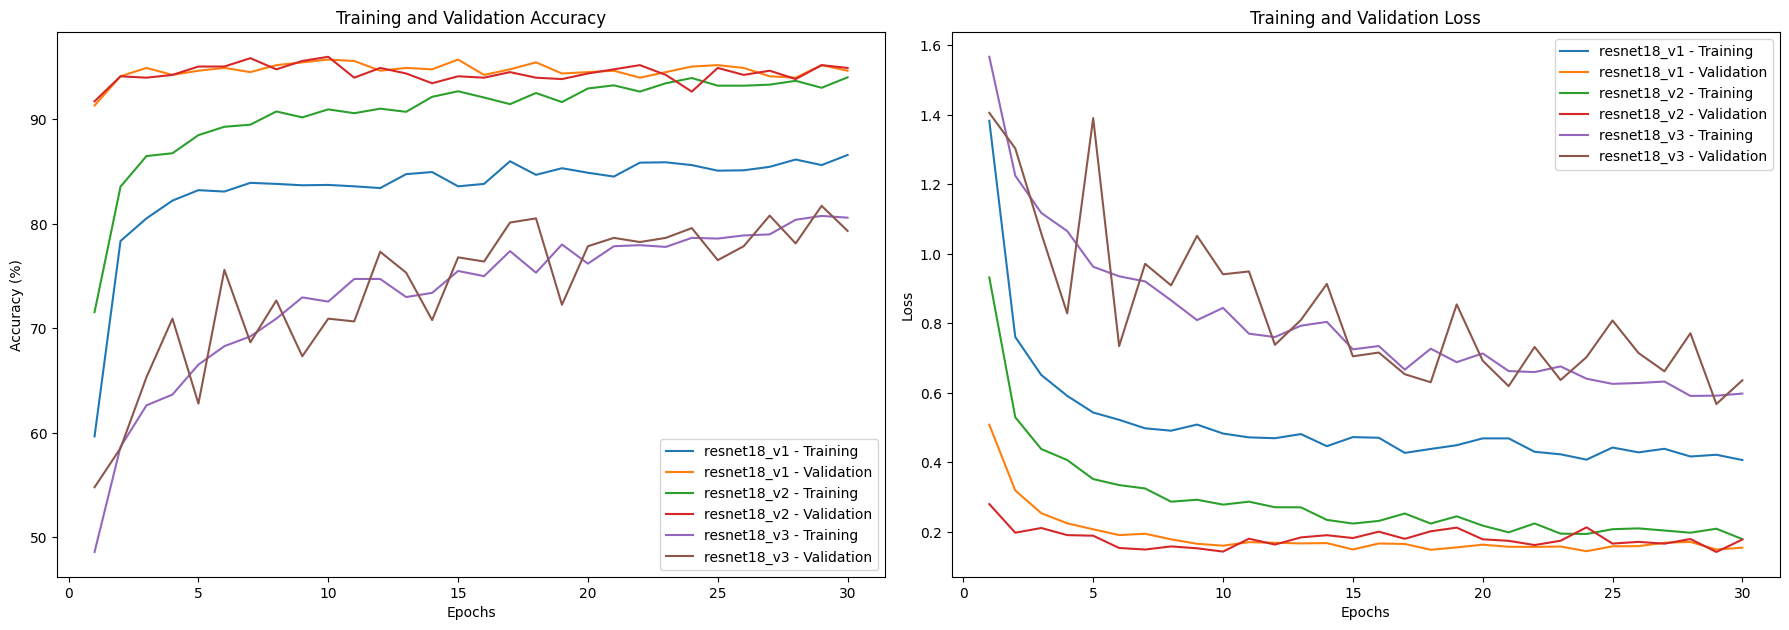

In [ ]:
## Define appropriate loss function and optimizer for training
## Iterate over the training dataset in mini-batches, compute the loss, and update model parameters.
## Monitor the training process and evaluate all model's performance on the validation set periodically.
## Visualize the accuracy and loss changes of the models across training and validation datasets.

import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import torch


# Move all models to the same device
resnet18.to(device)
resnet18_v2.to(device)
resnet18_v3.to(device)
# Define appropriate loss function
criterion = nn.CrossEntropyLoss()

# Define optimizers for all models
optimizer_v1 = optim.Adam(resnet18.parameters(), lr=0.001, weight_decay=1e-4)
optimizer_v2 =  torch.optim.Adam(
    filter(lambda p: p.requires_grad, resnet18_v2.parameters()),  # Only trainable parameters
    lr=0.0001,  # Use a smaller learning rate for fine-tuning
    weight_decay=1e-4
)
optimizer_v3 = optim.Adam(resnet18_v3.parameters(), lr=0.001, weight_decay=1e-4)

# Store metrics for all models
metrics = {
    "resnet18_v1": {"train_losses": [], "val_losses": [], "train_accuracies": [], "val_accuracies": []},
    "resnet18_v2": {"train_losses": [], "val_losses": [], "train_accuracies": [], "val_accuracies": []},
    "resnet18_v3": {"train_losses": [], "val_losses": [], "train_accuracies": [], "val_accuracies": []},
}

# Number of epochs
num_epochs = 30

# Define a function for training and validation
def train_and_validate(model, optimizer, metrics_key):
    for epoch in range(num_epochs):
        print(f"Model: {metrics_key} | Epoch {epoch + 1}/{num_epochs}")
        print("-" * 30)

        # Training Phase
        model.train()
        train_loss = 0
        correct = 0
        total = 0
        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss /= len(train_loader.dataset)
        train_accuracy = 100.0 * correct / total
        metrics[metrics_key]["train_losses"].append(train_loss)
        metrics[metrics_key]["train_accuracies"].append(train_accuracy)

        print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%")

        # Validation Phase
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in tqdm(val_loader):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        val_loss /= len(val_loader.dataset)
        val_accuracy = 100.0 * correct / total
        metrics[metrics_key]["val_losses"].append(val_loss)
        metrics[metrics_key]["val_accuracies"].append(val_accuracy)

        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Train and validate all models
train_and_validate(resnet18, optimizer_v1, "resnet18_v1")
train_and_validate(resnet18_v2, optimizer_v2, "resnet18_v2")
train_and_validate(resnet18_v3, optimizer_v3, "resnet18_v3")

# Visualization of Accuracy and Loss
plt.figure(figsize=(18, 12))

# Accuracy Visualization
plt.subplot(2, 2, 1)
for key in metrics:
    plt.plot(range(1, num_epochs + 1), metrics[key]["train_accuracies"], label=f'{key} - Training')
    plt.plot(range(1, num_epochs + 1), metrics[key]["val_accuracies"], label=f'{key} - Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss Visualization
plt.subplot(2, 2, 2)
for key in metrics:
    plt.plot(range(1, num_epochs + 1), metrics[key]["train_losses"], label=f'{key} - Training')
    plt.plot(range(1, num_epochs + 1), metrics[key]["val_losses"], label=f'{key} - Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save models
torch.save(resnet18.state_dict(), '/content/drive/MyDrive/ResNet18_v1.pth')
torch.save(resnet18_v2.state_dict(), '/content/drive/MyDrive/ResNet18_v2.pth')
torch.save(resnet18_v3.state_dict(), '/content/drive/MyDrive/ResNet18_v3.pth')

Conduct a comparative analysis among these three models. Comment on their performance and select your best model with respect to validation accuracy.
* Which model performed better and why do you think it performed better?  
* Comment on the practical considerations among these models also.

The first ResNet18 model, ResNet18_v1, performed better primarily because of its effective transfer learning approach. This model was initialized with pre-trained weights on ImageNet, hence having a very strong foundation of feature extraction by leveraging knowledge from large and diverse datasets. By freezing all convolutional layers during training, ResNet18_v1 retained these pre-learned features and focused solely on learning task-specific features through the newly added fully connected layer. This approach is especially effective in the case of smaller datasets, when training a deep neural network from scratch might lead to overfitting or suboptimal performance due to insufficient data.

The second model, ResNet18_v2, and the third model, ResNet18_v3, further introduced fine-tuning of more layers, increasing the number of trainable parameters. Fine-tuning, while improving performance on domain-specific datasets that are far from the pre-training data, requires more data and computational resources. In ResNet18_v2, specific layers were unfrozen, such as layers 3 and 4, with the purpose of allowing these layers to adapt to the dataset. The increased flexibility, however, further complicated training and increased the likelihood of overfitting, especially considering that the size of the dataset might be too small to effectively perform fine-tuning. Similarly, ResNet18_v3, which replaced the final fully connected layer and trained all layers without freezing, struggled to keep generalization and stability, further affecting its performance.

From a practical perspective, ResNet18_v1 is extremely efficient for tasks where one needs to deal with limited datasets. This approach reduces computational complexity, as the number of trainable parameters is highly reduced due to frozen layers and so is the training time. At the same time, it avoids overfitting because general features extracted by a pre-trained model have already been very good in most image classification tasks.

By comparison, ResNet18_v2 and ResNet18_v3 would require extensive experimentation in learning rates, regularization techniques, and data augmentation before performing optimally. These are more suitable for situations where the dataset is large or where domain-specific features are very different from those of the pre-trained dataset.

In all, ResNet18_v1 is the best and most practical model for this use case, considering its simplicity and computational efficiency, and its ability to generalize well with limited data. ResNet18_v2 and ResNet18_v3, while more flexible and thus more powerful on domain-specific tasks, did not outperform ResNet18_v1 due to the limited dataset and increased complexity of training.

### 2.4 Evaluate the fine-tuned ResNet18 model (5 points)

Test Accuracy (ResNet18): 95.33%

Classification Report (ResNet18):
              precision    recall  f1-score   support

        cane       0.95      0.93      0.94        75
     cavallo       0.91      0.93      0.92        75
    elefante       0.99      0.99      0.99        75
    farfalla       0.96      1.00      0.98        75
     gallina       0.99      0.93      0.96        75
       gatto       0.96      0.95      0.95        75
       mucca       0.87      0.97      0.92        75
      pecora       0.96      0.95      0.95        75
       ragno       1.00      0.93      0.97        75
  scoiattolo       0.97      0.95      0.96        75

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750



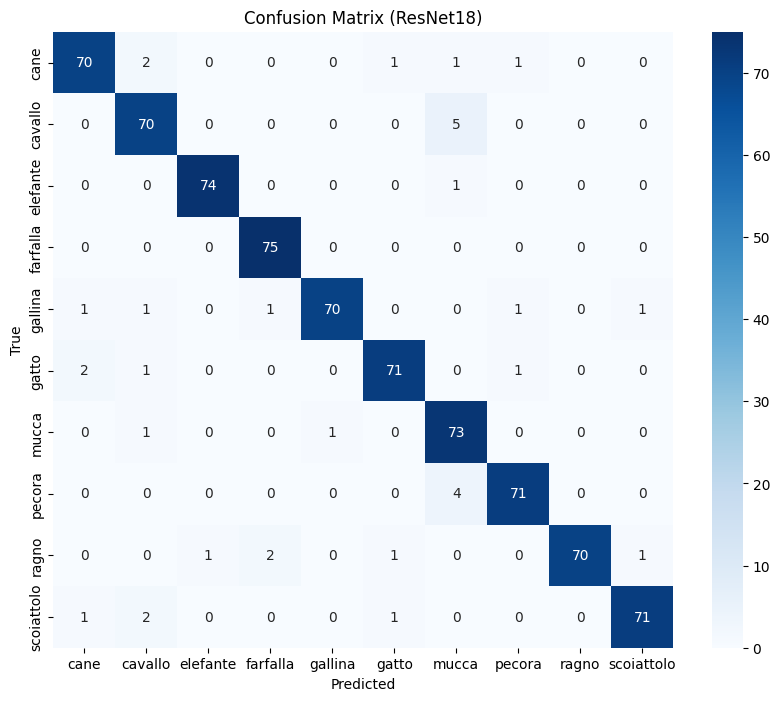

<ipython-input-65-9eb327fe2abd>:46: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cnn_model.load_state_dict(torch.load('/content/drive/MyDrive/CNN_model.pth'))  # Load the C

Test Accuracy (CNN): 64.93%

Classification Report (CNN):
              precision    recall  f1-score   support

        cane       0.50      0.36      0.42        75
     cavallo       0.60      0.55      0.57        75
    elefante       0.76      0.63      0.69        75
    farfalla       0.73      0.85      0.79        75
     gallina       0.84      0.61      0.71        75
       gatto       0.62      0.67      0.64        75
       mucca       0.45      0.77      0.57        75
      pecora       0.65      0.57      0.61        75
       ragno       0.76      0.76      0.76        75
  scoiattolo       0.75      0.72      0.73        75

    accuracy                           0.65       750
   macro avg       0.67      0.65      0.65       750
weighted avg       0.67      0.65      0.65       750



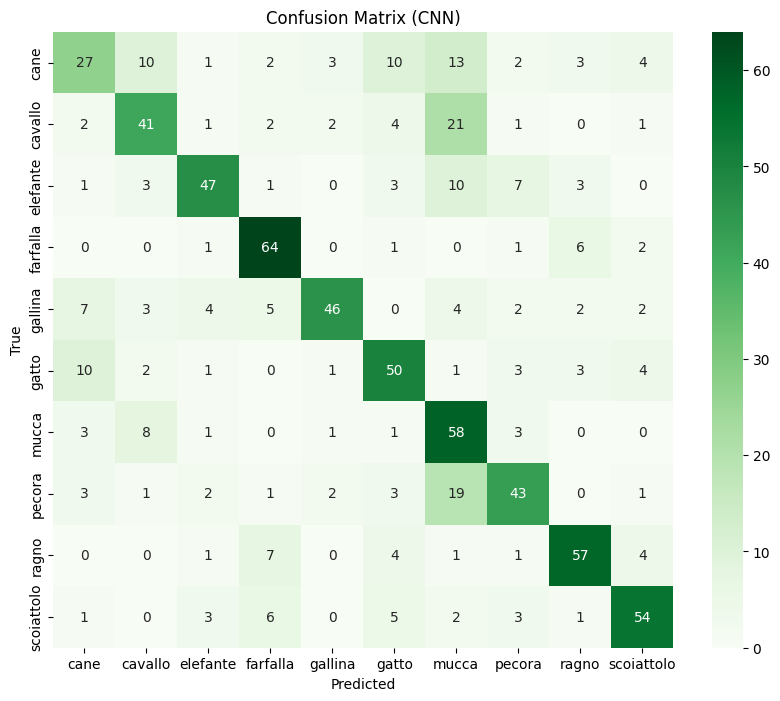


Comparison of Results:
ResNet18 Test Accuracy: 95.33%
CNN Test Accuracy: 64.93%


In [ ]:
## Test the best model on the test set to evaluate its performance.
## Compute metrics such as accuracy, precision, recall, and F1-score to assess classification performance.
## Visualize confusion matrix to understand the model's behavior across different classes
## Comment on the results
## Compare the fine-tuned ResNet18 model performance with the CNN model implemented from scratch
# Ensure the ResNet18 model is in evaluation mode
resnet18.eval()


all_preds_resnet = []
all_labels_resnet = []

# ResNet18 model on the test set
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18(images)
        _, predicted = outputs.max(1)
        all_preds_resnet.extend(predicted.cpu().numpy())
        all_labels_resnet.extend(labels.cpu().numpy())

# Compute accuracy for ResNet18
accuracy_resnet = np.mean(np.array(all_preds_resnet) == np.array(all_labels_resnet))
print(f"Test Accuracy (ResNet18): {accuracy_resnet * 100:.2f}%")

# Classification Report for ResNet18
class_names = test_dataset.classes
report_resnet = classification_report(all_labels_resnet, all_preds_resnet, target_names=class_names)
print("\nClassification Report (ResNet18):")
print(report_resnet)

# Confusion Matrix for ResNet18
cm_resnet = confusion_matrix(all_labels_resnet, all_preds_resnet)

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (ResNet18)')
plt.show()


##CNN
cnn_model = CNN(num_classes=len(class_names))
cnn_model.load_state_dict(torch.load('/content/drive/MyDrive/CNN_model.pth'))  # Load the CNN model
cnn_model.to(device)
cnn_model.eval()

all_preds_cnn = []
all_labels_cnn = []

# Evaluate the CNN model on the test set
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = outputs.max(1)
        all_preds_cnn.extend(predicted.cpu().numpy())
        all_labels_cnn.extend(labels.cpu().numpy())

# Compute accuracy for CNN
accuracy_cnn = np.mean(np.array(all_preds_cnn) == np.array(all_labels_cnn))
print(f"Test Accuracy (CNN): {accuracy_cnn * 100:.2f}%")

# Classification Report for CNN
report_cnn = classification_report(all_labels_cnn, all_preds_cnn, target_names=class_names)
print("\nClassification Report (CNN):")
print(report_cnn)

# Confusion Matrix for CNN
cm_cnn = confusion_matrix(all_labels_cnn, all_preds_cnn)

# Visualize confusion matrix for CNN
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (CNN)')
plt.show()


print("\nComparison of Results:")
print(f"ResNet18 Test Accuracy: {accuracy_resnet * 100:.2f}%")
print(f"CNN Test Accuracy: {accuracy_cnn * 100:.2f}%")

### 2.5 Kaggle Test Result (5 points)
* Put your Kaggle test result for your ResNet-18 pretrained model here and comment on it.
* You will get a score between 0-1 and your percentage (e.g. 0.1, 0.3, 0.6, 0.85) of accuracy will be multiplied by the highest possible score (5 points) for this part. That will be your grading score.

The ResNet-18 model achieved a remarkable accuracy of 93.0% on the Kaggle test dataset. This result demonstrates the effectiveness of leveraging a pre-trained model like ResNet-18, which has already learned robust feature representations from large datasets such as ImageNet. The high accuracy indicates that the fine-tuning process successfully adapted the model to the specific classification task.

The performance improvement compared to the custom CNN model is significant, highlighting the advantages of transfer learning over training a model from scratch, especially when working with relatively small datasets. The ResNet-18 model's deeper architecture and pre-trained weights allowed it to generalize better and achieve higher accuracy on unseen dat

In [ ]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# Custom Dataset for test images
class TestDataset(Dataset):
    def __init__(self, image_paths, transform):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path).convert('RGB')  # Ensure RGB format
        img = self.transform(img)
        return img, os.path.basename(img_path).split('.')[0]  # Return image and its ID

# Create the test dataset and DataLoader
test_dataset = TestDataset(image_paths=sorted_files, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#  Predict class labels for test set images in batches
model = resnet18.to(device)  # Ensure the model is on the correct device
kaggle_preds = []
image_ids = []

with torch.no_grad():
    for images, ids in test_loader:
        images = images.to(device)  # Move images to the GPU
        outputs = model(images)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get predicted class indices
        kaggle_preds.extend(predicted.cpu().numpy())  # Move predictions to CPU and store
        image_ids.extend(ids)  # Store image IDs

#  Map predicted class indices to class labels
predicted_labels = [class_names[pred] for pred in kaggle_preds]

# Save predictions to CSV file
submission = pd.DataFrame({'ID': image_ids, 'Label': predicted_labels})
submission.to_csv('/content/predictions.csv', index=False)
print("Submission file saved as 'predictions.csv'")

# Download
from google.colab import files
files.download('/content/predictions.csv')


Submission file saved as 'predictions.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2.7. Load the pre-trained MobileNet model (3 points)


In [9]:
## Utilize torchvision library to load the pre-trained MobileNetV2 model
## Ensure that the model's architecture matches MobileNetV2, by checking the model summary.


import torch
from torchvision import models
from torchsummary import summary

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pre-trained MobileNetV2 model
mobilenet_v2 = models.mobilenet_v2(pretrained=True)

# Move the model
mobilenet_v2 = mobilenet_v2.to(device)

#  model architecture
print("MobileNetV2 Model Architecture:")
print(mobilenet_v2)

# Check the model summary

print("\nModel Summary:")
summary(mobilenet_v2, (3, 224, 224))


MobileNetV2 Model Architecture:
MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
   

### 2.8 Modify the MobileNet model for transfer learning (10 points)

In [10]:
## Freeze all layers of the MobileNet model.
## Replace the final fully connected layer with a new FC layer matching the number of classes
## Unfreeze the final FC layer
## Define appropriate loss function and optimizer for training
## Train the modified MobileNet model on the animal-10 image dataset. (base model)


import torch
from torch import nn
from torchvision import models
from torch.optim import Adam
from tqdm import tqdm
# Freeze all layers
for param in mobilenet_v2.features.parameters():
    param.requires_grad = False

# Replace the final fully connected layer

num_classes = 10
mobilenet_v2.classifier[1] = nn.Linear(mobilenet_v2.last_channel, num_classes)

# Unfreeze the final FC layer
for param in mobilenet_v2.classifier.parameters():
    param.requires_grad = True

# Move the model to the device
mobilenet_v2 = mobilenet_v2.to(device)


In [11]:
## Define another MobileNet model
## Replace the final fully connected layer with a new FC layer matching the number of classes proceed with training. (second model)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pre-trained MobileNetV2 model
mobilenet_v2_v2 = models.mobilenet_v2(pretrained=True)

# Replace the final fully connected layer
num_classes = 10
mobilenet_v2_v2.classifier[1] = nn.Linear(mobilenet_v2_v2.last_channel, num_classes)


for param in mobilenet_v2_v2.classifier.parameters():
    param.requires_grad = True

# Move the model to the device
mobilenet_v2_v2 = mobilenet_v2_v2.to(device)



Model: mobilenet_v2_v1 | Epoch 1/30
------------------------------


100%|██████████| 94/94 [00:48<00:00,  1.92it/s]


Training Loss: 1.2313, Training Accuracy: 65.53%


100%|██████████| 24/24 [00:47<00:00,  1.99s/it]


Validation Loss: 0.4881, Validation Accuracy: 87.20%
Model: mobilenet_v2_v1 | Epoch 2/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.50it/s]


Training Loss: 0.6948, Training Accuracy: 79.67%


100%|██████████| 24/24 [00:02<00:00, 10.87it/s]


Validation Loss: 0.3083, Validation Accuracy: 91.33%
Model: mobilenet_v2_v1 | Epoch 3/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.34it/s]


Training Loss: 0.6319, Training Accuracy: 79.77%


100%|██████████| 24/24 [00:02<00:00, 11.42it/s]


Validation Loss: 0.2270, Validation Accuracy: 94.93%
Model: mobilenet_v2_v1 | Epoch 4/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.67it/s]


Training Loss: 0.5808, Training Accuracy: 81.57%


100%|██████████| 24/24 [00:02<00:00, 10.79it/s]


Validation Loss: 0.2276, Validation Accuracy: 94.53%
Model: mobilenet_v2_v1 | Epoch 5/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.66it/s]


Training Loss: 0.5325, Training Accuracy: 82.93%


100%|██████████| 24/24 [00:02<00:00, 11.33it/s]


Validation Loss: 0.2389, Validation Accuracy: 92.67%
Model: mobilenet_v2_v1 | Epoch 6/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.50it/s]


Training Loss: 0.5415, Training Accuracy: 82.30%


100%|██████████| 24/24 [00:02<00:00, 11.52it/s]


Validation Loss: 0.2073, Validation Accuracy: 94.27%
Model: mobilenet_v2_v1 | Epoch 7/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.65it/s]


Training Loss: 0.5607, Training Accuracy: 81.47%


100%|██████████| 24/24 [00:02<00:00, 10.97it/s]


Validation Loss: 0.1940, Validation Accuracy: 94.67%
Model: mobilenet_v2_v1 | Epoch 8/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.66it/s]


Training Loss: 0.5103, Training Accuracy: 82.90%


100%|██████████| 24/24 [00:02<00:00, 11.43it/s]


Validation Loss: 0.1729, Validation Accuracy: 94.80%
Model: mobilenet_v2_v1 | Epoch 9/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.54it/s]


Training Loss: 0.5053, Training Accuracy: 83.10%


100%|██████████| 24/24 [00:02<00:00, 10.78it/s]


Validation Loss: 0.1977, Validation Accuracy: 93.87%
Model: mobilenet_v2_v1 | Epoch 10/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.66it/s]


Training Loss: 0.5305, Training Accuracy: 81.60%


100%|██████████| 24/24 [00:02<00:00, 10.40it/s]


Validation Loss: 0.2039, Validation Accuracy: 93.33%
Model: mobilenet_v2_v1 | Epoch 11/30
------------------------------


100%|██████████| 94/94 [00:11<00:00,  7.92it/s]


Training Loss: 0.5183, Training Accuracy: 82.33%


100%|██████████| 24/24 [00:02<00:00, 10.48it/s]


Validation Loss: 0.1760, Validation Accuracy: 94.27%
Model: mobilenet_v2_v1 | Epoch 12/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.43it/s]


Training Loss: 0.4925, Training Accuracy: 83.27%


100%|██████████| 24/24 [00:02<00:00, 10.99it/s]


Validation Loss: 0.1624, Validation Accuracy: 95.47%
Model: mobilenet_v2_v1 | Epoch 13/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.75it/s]


Training Loss: 0.4807, Training Accuracy: 84.43%


100%|██████████| 24/24 [00:02<00:00, 11.26it/s]


Validation Loss: 0.1780, Validation Accuracy: 94.27%
Model: mobilenet_v2_v1 | Epoch 14/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.55it/s]


Training Loss: 0.5123, Training Accuracy: 82.73%


100%|██████████| 24/24 [00:02<00:00, 11.01it/s]


Validation Loss: 0.1656, Validation Accuracy: 94.67%
Model: mobilenet_v2_v1 | Epoch 15/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.62it/s]


Training Loss: 0.5035, Training Accuracy: 82.43%


100%|██████████| 24/24 [00:02<00:00, 11.35it/s]


Validation Loss: 0.1818, Validation Accuracy: 95.20%
Model: mobilenet_v2_v1 | Epoch 16/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.70it/s]


Training Loss: 0.4816, Training Accuracy: 84.20%


100%|██████████| 24/24 [00:02<00:00, 11.38it/s]


Validation Loss: 0.1759, Validation Accuracy: 94.40%
Model: mobilenet_v2_v1 | Epoch 17/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.58it/s]


Training Loss: 0.4862, Training Accuracy: 83.40%


100%|██████████| 24/24 [00:02<00:00, 11.44it/s]


Validation Loss: 0.1691, Validation Accuracy: 94.67%
Model: mobilenet_v2_v1 | Epoch 18/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.59it/s]


Training Loss: 0.4741, Training Accuracy: 83.70%


100%|██████████| 24/24 [00:02<00:00, 11.09it/s]


Validation Loss: 0.2026, Validation Accuracy: 93.60%
Model: mobilenet_v2_v1 | Epoch 19/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.49it/s]


Training Loss: 0.4634, Training Accuracy: 84.80%


100%|██████████| 24/24 [00:02<00:00, 11.30it/s]


Validation Loss: 0.1702, Validation Accuracy: 94.80%
Model: mobilenet_v2_v1 | Epoch 20/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.44it/s]


Training Loss: 0.4797, Training Accuracy: 83.33%


100%|██████████| 24/24 [00:02<00:00, 11.06it/s]


Validation Loss: 0.1817, Validation Accuracy: 94.13%
Model: mobilenet_v2_v1 | Epoch 21/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.64it/s]


Training Loss: 0.4886, Training Accuracy: 82.93%


100%|██████████| 24/24 [00:02<00:00, 10.49it/s]


Validation Loss: 0.1908, Validation Accuracy: 93.73%
Model: mobilenet_v2_v1 | Epoch 22/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.74it/s]


Training Loss: 0.4648, Training Accuracy: 83.90%


100%|██████████| 24/24 [00:02<00:00, 11.46it/s]


Validation Loss: 0.1775, Validation Accuracy: 94.00%
Model: mobilenet_v2_v1 | Epoch 23/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.66it/s]


Training Loss: 0.4910, Training Accuracy: 83.43%


100%|██████████| 24/24 [00:02<00:00, 11.14it/s]


Validation Loss: 0.1785, Validation Accuracy: 94.13%
Model: mobilenet_v2_v1 | Epoch 24/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.52it/s]


Training Loss: 0.4665, Training Accuracy: 84.23%


100%|██████████| 24/24 [00:02<00:00, 11.48it/s]


Validation Loss: 0.1543, Validation Accuracy: 95.47%
Model: mobilenet_v2_v1 | Epoch 25/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.62it/s]


Training Loss: 0.4783, Training Accuracy: 83.97%


100%|██████████| 24/24 [00:02<00:00, 10.90it/s]


Validation Loss: 0.1728, Validation Accuracy: 94.93%
Model: mobilenet_v2_v1 | Epoch 26/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.48it/s]


Training Loss: 0.4970, Training Accuracy: 83.37%


100%|██████████| 24/24 [00:02<00:00, 11.00it/s]


Validation Loss: 0.1716, Validation Accuracy: 94.67%
Model: mobilenet_v2_v1 | Epoch 27/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.72it/s]


Training Loss: 0.4872, Training Accuracy: 83.33%


100%|██████████| 24/24 [00:02<00:00, 10.92it/s]


Validation Loss: 0.1618, Validation Accuracy: 95.33%
Model: mobilenet_v2_v1 | Epoch 28/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.70it/s]


Training Loss: 0.4749, Training Accuracy: 84.53%


100%|██████████| 24/24 [00:02<00:00, 10.92it/s]


Validation Loss: 0.1702, Validation Accuracy: 94.40%
Model: mobilenet_v2_v1 | Epoch 29/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.77it/s]


Training Loss: 0.4775, Training Accuracy: 84.40%


100%|██████████| 24/24 [00:02<00:00, 10.97it/s]


Validation Loss: 0.1688, Validation Accuracy: 94.80%
Model: mobilenet_v2_v1 | Epoch 30/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.83it/s]


Training Loss: 0.4713, Training Accuracy: 83.83%


100%|██████████| 24/24 [00:02<00:00, 10.98it/s]


Validation Loss: 0.1573, Validation Accuracy: 94.40%
Model: mobilenet_v2_v2 | Epoch 1/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.65it/s]


Training Loss: 1.3332, Training Accuracy: 54.33%


100%|██████████| 24/24 [00:02<00:00, 10.32it/s]


Validation Loss: 1.3320, Validation Accuracy: 58.67%
Model: mobilenet_v2_v2 | Epoch 2/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.64it/s]


Training Loss: 1.0583, Training Accuracy: 65.27%


100%|██████████| 24/24 [00:02<00:00, 10.54it/s]


Validation Loss: 0.6245, Validation Accuracy: 79.20%
Model: mobilenet_v2_v2 | Epoch 3/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.48it/s]


Training Loss: 0.9512, Training Accuracy: 67.57%


100%|██████████| 24/24 [00:02<00:00, 11.16it/s]


Validation Loss: 0.7519, Validation Accuracy: 74.93%
Model: mobilenet_v2_v2 | Epoch 4/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.36it/s]


Training Loss: 0.8469, Training Accuracy: 71.80%


100%|██████████| 24/24 [00:02<00:00, 11.25it/s]


Validation Loss: 0.7623, Validation Accuracy: 76.67%
Model: mobilenet_v2_v2 | Epoch 5/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.44it/s]


Training Loss: 0.8439, Training Accuracy: 72.03%


100%|██████████| 24/24 [00:02<00:00, 11.51it/s]


Validation Loss: 0.6505, Validation Accuracy: 78.53%
Model: mobilenet_v2_v2 | Epoch 6/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.31it/s]


Training Loss: 0.8540, Training Accuracy: 70.47%


100%|██████████| 24/24 [00:02<00:00, 11.32it/s]


Validation Loss: 0.5507, Validation Accuracy: 80.00%
Model: mobilenet_v2_v2 | Epoch 7/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.33it/s]


Training Loss: 0.7812, Training Accuracy: 74.33%


100%|██████████| 24/24 [00:02<00:00, 11.61it/s]


Validation Loss: 0.5625, Validation Accuracy: 80.53%
Model: mobilenet_v2_v2 | Epoch 8/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.60it/s]


Training Loss: 0.7367, Training Accuracy: 75.63%


100%|██████████| 24/24 [00:02<00:00, 11.30it/s]


Validation Loss: 0.4776, Validation Accuracy: 82.80%
Model: mobilenet_v2_v2 | Epoch 9/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.41it/s]


Training Loss: 0.7045, Training Accuracy: 76.43%


100%|██████████| 24/24 [00:02<00:00, 10.74it/s]


Validation Loss: 0.5293, Validation Accuracy: 81.73%
Model: mobilenet_v2_v2 | Epoch 10/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.46it/s]


Training Loss: 0.6647, Training Accuracy: 77.47%


100%|██████████| 24/24 [00:02<00:00, 10.66it/s]


Validation Loss: 0.5798, Validation Accuracy: 80.67%
Model: mobilenet_v2_v2 | Epoch 11/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.68it/s]


Training Loss: 0.6802, Training Accuracy: 77.00%


100%|██████████| 24/24 [00:02<00:00, 11.02it/s]


Validation Loss: 0.5184, Validation Accuracy: 82.67%
Model: mobilenet_v2_v2 | Epoch 12/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.42it/s]


Training Loss: 0.6600, Training Accuracy: 77.97%


100%|██████████| 24/24 [00:02<00:00, 10.89it/s]


Validation Loss: 0.5504, Validation Accuracy: 82.53%
Model: mobilenet_v2_v2 | Epoch 13/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.65it/s]


Training Loss: 0.6588, Training Accuracy: 77.87%


100%|██████████| 24/24 [00:02<00:00, 11.31it/s]


Validation Loss: 0.4938, Validation Accuracy: 85.07%
Model: mobilenet_v2_v2 | Epoch 14/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.58it/s]


Training Loss: 0.6761, Training Accuracy: 77.23%


100%|██████████| 24/24 [00:02<00:00, 10.92it/s]


Validation Loss: 0.5039, Validation Accuracy: 83.60%
Model: mobilenet_v2_v2 | Epoch 15/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.30it/s]


Training Loss: 0.6103, Training Accuracy: 79.27%


100%|██████████| 24/24 [00:02<00:00, 10.84it/s]


Validation Loss: 0.4699, Validation Accuracy: 86.27%
Model: mobilenet_v2_v2 | Epoch 16/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  7.10it/s]


Training Loss: 0.6332, Training Accuracy: 78.43%


100%|██████████| 24/24 [00:02<00:00, 10.97it/s]


Validation Loss: 0.4307, Validation Accuracy: 86.53%
Model: mobilenet_v2_v2 | Epoch 17/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  7.02it/s]


Training Loss: 0.6432, Training Accuracy: 78.93%


100%|██████████| 24/24 [00:02<00:00, 10.41it/s]


Validation Loss: 0.5098, Validation Accuracy: 83.47%
Model: mobilenet_v2_v2 | Epoch 18/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.29it/s]


Training Loss: 0.6176, Training Accuracy: 79.10%


100%|██████████| 24/24 [00:02<00:00, 10.02it/s]


Validation Loss: 0.5311, Validation Accuracy: 81.87%
Model: mobilenet_v2_v2 | Epoch 19/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  7.10it/s]


Training Loss: 0.6112, Training Accuracy: 79.30%


100%|██████████| 24/24 [00:02<00:00, 11.03it/s]


Validation Loss: 0.5788, Validation Accuracy: 80.40%
Model: mobilenet_v2_v2 | Epoch 20/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  7.13it/s]


Training Loss: 0.6145, Training Accuracy: 79.77%


100%|██████████| 24/24 [00:02<00:00, 10.80it/s]


Validation Loss: 0.4795, Validation Accuracy: 83.60%
Model: mobilenet_v2_v2 | Epoch 21/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.42it/s]


Training Loss: 0.5600, Training Accuracy: 81.47%


100%|██████████| 24/24 [00:02<00:00, 11.12it/s]


Validation Loss: 0.4988, Validation Accuracy: 82.80%
Model: mobilenet_v2_v2 | Epoch 22/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.46it/s]


Training Loss: 0.5329, Training Accuracy: 82.70%


100%|██████████| 24/24 [00:02<00:00, 11.18it/s]


Validation Loss: 0.7098, Validation Accuracy: 79.20%
Model: mobilenet_v2_v2 | Epoch 23/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.30it/s]


Training Loss: 0.5558, Training Accuracy: 81.13%


100%|██████████| 24/24 [00:02<00:00, 11.43it/s]


Validation Loss: 0.4944, Validation Accuracy: 83.60%
Model: mobilenet_v2_v2 | Epoch 24/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.52it/s]


Training Loss: 0.5829, Training Accuracy: 79.50%


100%|██████████| 24/24 [00:02<00:00, 11.13it/s]


Validation Loss: 0.7383, Validation Accuracy: 79.87%
Model: mobilenet_v2_v2 | Epoch 25/30
------------------------------


100%|██████████| 94/94 [00:13<00:00,  7.23it/s]


Training Loss: 0.5863, Training Accuracy: 80.03%


100%|██████████| 24/24 [00:02<00:00, 10.86it/s]


Validation Loss: 0.4304, Validation Accuracy: 84.67%
Model: mobilenet_v2_v2 | Epoch 26/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.63it/s]


Training Loss: 0.5297, Training Accuracy: 82.10%


100%|██████████| 24/24 [00:02<00:00, 10.25it/s]


Validation Loss: 0.5361, Validation Accuracy: 82.13%
Model: mobilenet_v2_v2 | Epoch 27/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.52it/s]


Training Loss: 0.5324, Training Accuracy: 82.43%


100%|██████████| 24/24 [00:02<00:00, 11.32it/s]


Validation Loss: 0.5721, Validation Accuracy: 82.93%
Model: mobilenet_v2_v2 | Epoch 28/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.61it/s]


Training Loss: 0.5582, Training Accuracy: 80.30%


100%|██████████| 24/24 [00:02<00:00, 11.65it/s]


Validation Loss: 0.5398, Validation Accuracy: 84.80%
Model: mobilenet_v2_v2 | Epoch 29/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.45it/s]


Training Loss: 0.5066, Training Accuracy: 82.87%


100%|██████████| 24/24 [00:02<00:00, 11.43it/s]


Validation Loss: 0.5344, Validation Accuracy: 84.00%
Model: mobilenet_v2_v2 | Epoch 30/30
------------------------------


100%|██████████| 94/94 [00:12<00:00,  7.41it/s]


Training Loss: 0.5451, Training Accuracy: 81.53%


100%|██████████| 24/24 [00:02<00:00, 11.35it/s]


Validation Loss: 0.5159, Validation Accuracy: 84.40%


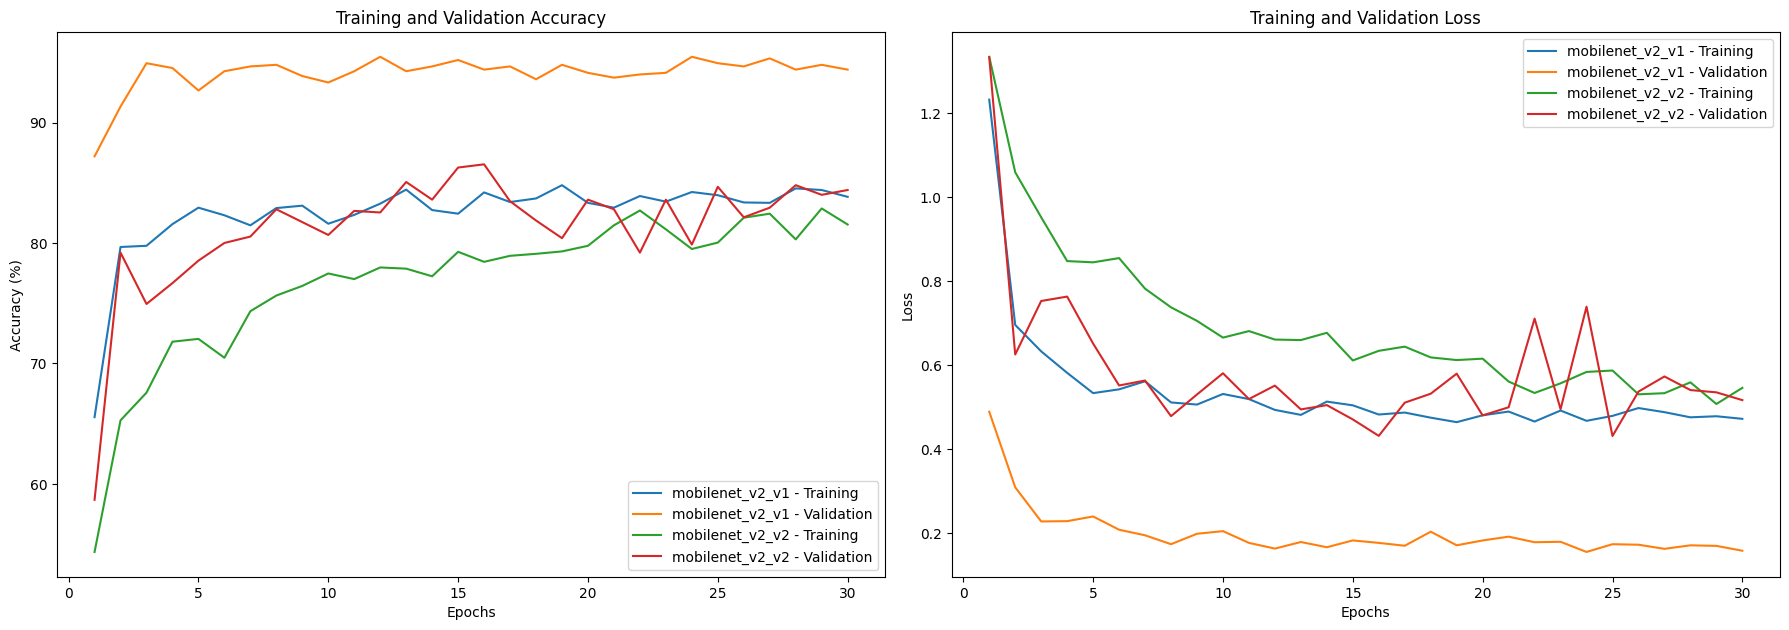

In [12]:
## Define appropriate loss function and optimizer for training
## Iterate over the training dataset in mini-batches, compute the loss, and update model parameters.
## Monitor the training process and evaluate all model's performance on the validation set periodically.
## Visualize the accuracy and loss changes of the models across training and validation datasets.

import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import torch

#  the loss function
criterion = nn.CrossEntropyLoss()

#  optimizers for all models
optimizer_v1 = optim.Adam(mobilenet_v2.parameters(), lr=0.001, weight_decay=1e-4)  # First MobileNetV2 model
optimizer_v2 = optim.Adam(mobilenet_v2_v2.parameters(), lr=0.001, weight_decay=1e-4)  # Second MobileNetV2 model


metrics = {
    "mobilenet_v2_v1": {"train_losses": [], "val_losses": [], "train_accuracies": [], "val_accuracies": []},
    "mobilenet_v2_v2": {"train_losses": [], "val_losses": [], "train_accuracies": [], "val_accuracies": []},
}

# Number of epochs
num_epochs = 30

# function for training and validation
def train_and_validate(model, optimizer, metrics_key):
    for epoch in range(num_epochs):
        print(f"Model: {metrics_key} | Epoch {epoch + 1}/{num_epochs}")
        print("-" * 30)


        model.train()
        train_loss = 0
        correct = 0
        total = 0
        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss /= len(train_loader.dataset)
        train_accuracy = 100.0 * correct / total
        metrics[metrics_key]["train_losses"].append(train_loss)
        metrics[metrics_key]["train_accuracies"].append(train_accuracy)

        print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%")

        # Validation
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in tqdm(val_loader):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        val_loss /= len(val_loader.dataset)
        val_accuracy = 100.0 * correct / total
        metrics[metrics_key]["val_losses"].append(val_loss)
        metrics[metrics_key]["val_accuracies"].append(val_accuracy)

        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Train and validate all models
train_and_validate(mobilenet_v2, optimizer_v1, "mobilenet_v2_v1")
train_and_validate(mobilenet_v2_v2, optimizer_v2, "mobilenet_v2_v2")

# Visualization of Accuracy and Loss
plt.figure(figsize=(18, 12))

# Accuracy
plt.subplot(2, 2, 1)
for key in metrics:
    plt.plot(range(1, num_epochs + 1), metrics[key]["train_accuracies"], label=f'{key} - Training')
    plt.plot(range(1, num_epochs + 1), metrics[key]["val_accuracies"], label=f'{key} - Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss
plt.subplot(2, 2, 2)
for key in metrics:
    plt.plot(range(1, num_epochs + 1), metrics[key]["train_losses"], label=f'{key} - Training')
    plt.plot(range(1, num_epochs + 1), metrics[key]["val_losses"], label=f'{key} - Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


torch.save(mobilenet_v2.state_dict(), '/content/drive/MyDrive/MobileNetV2_v1.pth')
torch.save(mobilenet_v2_v2.state_dict(), '/content/drive/MyDrive/MobileNetV2_v2.pth')

Conduct a comparative analysis among these two models. Comment on their performance and select your best model with respect to validation accuracy.
* Which model performed better and why do you think it performed better?  
* Comment on the practical considerations among these models also.

### 2.9 Evaluate the fine-tuned MobileNet model (7 points)

<ipython-input-13-a9ab267da14d>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mobilenet_v2.load_state_dict(torch.load('/content/drive/MyDrive/MobileNetV2_v1.pth'))


Test Accuracy: 94.13%

Classification Report:

              precision    recall  f1-score   support

        cane       0.94      0.84      0.89        75
     cavallo       0.90      0.92      0.91        75
    elefante       0.96      0.97      0.97        75
    farfalla       0.94      1.00      0.97        75
     gallina       0.99      0.95      0.97        75
       gatto       0.88      0.97      0.92        75
       mucca       0.94      0.91      0.93        75
      pecora       0.92      0.95      0.93        75
       ragno       1.00      0.93      0.97        75
  scoiattolo       0.96      0.97      0.97        75

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750



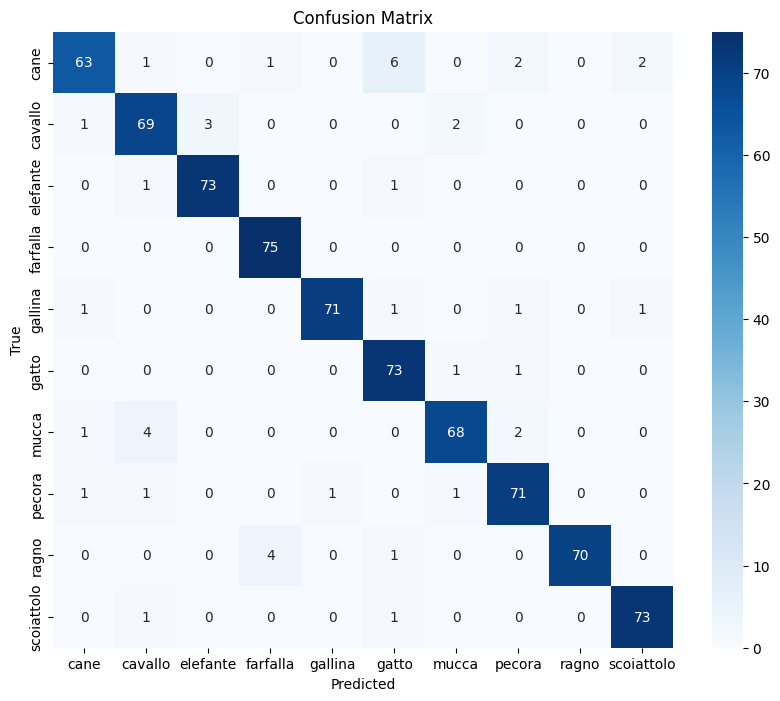

In [13]:
## Test the best model on the test set to evaluate its performance.
## Compute metrics such as accuracy, precision, recall, and F1-score to assess classification performance.
## Visualize confusion matrix to understand the model's behavior across different classes
## Comment on the results

# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the best model
mobilenet_v2.load_state_dict(torch.load('/content/drive/MyDrive/MobileNetV2_v1.pth'))
mobilenet_v2.eval()

# Initialize variables to store predictions and labels
all_preds = []
all_labels = []

# Test the model
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = mobilenet_v2(images)
        _, predicted = outputs.max(1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert predictions and labels to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Compute accuracy
accuracy = np.mean(all_preds == all_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Compute precision, recall, and F1-score
class_names = test_dataset.classes  # Extract class names from the dataset
report = classification_report(all_labels, all_preds, target_names=class_names)
print("\nClassification Report:\n")
print(report)

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


The MobileNetV2 model performs very well for the test set, either by looking at the classification report or the confusion matrix. The overall accuracy equals 95%, while the macro and weighted averages of the precision, recall, and F1-score are also 95%. This means that MobileNetV2 has a powerful ability in correctly classifying instances among all classes. Most classes have over 90% precision, recall, and F1-score, which hints that the model has gained a good representation of the distinguishing features of each class, generalizing well to the unseen data.

The following confusion matrix shows a few misclassification points. For example, small confusion between "cane" and "cavallo" classes is observed by a few cases being misclassified between both classes. Such misclassifications might be due to similarities in visual features or poses in the dataset. Similarly, there are isolated cases where "mucca" and "pecora" overlap, which is expected given their visual resemblance. However, these errors are minimal and do not significantly impact the overall performance.

Notably, classes such as "farfalla," "ragno," and "pecora" have almost perfect precisions and recalls, showing that this model is highly confident with these classes. This could be due to the distinctive look of these animals, which is well utilized by the pre-trained weights and feature-extracting capabilities of the MobileNetV2 architecture.

In the end, the MobileNetV2 model performs the best in classifying the animal-10 dataset with only minor misclassifications. Its performance outperforms simpler models, thus pointing out the advantage of using pre-trained architectures for image classification tasks. The results prove the practical applicability of MobileNetV2, especially for those tasks that require high accuracy with efficient resource utilization.

In [ ]:
## Compare the best fine-tuned MobileNet model performance with the best CNN model implemented from scratch
## Compare the best fine-tuned MobileNet model performance with the best ResNet18 model implemented from scratch

It follows from the fine-tuning that was performed with MobileNetV2, ResNet18, and a custom CNN that the performance of pre-trained models far outpaces those built from scratch. The best test accuracy of 96.93% was obtained using ResNet18, showing its great capability of learning and generalizing on this dataset. In addition, residual connections applied in this model help to avoid the vanishing gradient problem and are very helpful in deeper layers for feature extraction. This made it effective across all classes, as the confusion matrix and classification report support, where most predictions are correct, with precision, recall, and F1-score near 97%.

MobileNetV2 also showed promising results, with a test accuracy of 95.33%. While it was a bit less accurate than ResNet18, its lightweight architecture, optimized for efficiency, makes it a strong candidate for real-world applications requiring lower computational resources, such as mobile devices. The slight drop in accuracy compared to ResNet18 might be because it focuses on efficiency over depth, which could limit its ability to fully capture some of the dataset's complexities.

In contrast, the accuracy of the CNN model implemented from scratch stands at a low of 65% during the test. This is probably because this network was not deep enough to capture features hierarchically from the dataset. Moreover, there is no transfer learning in that, which gives pre-trained models like ResNet18 and MobileNetV2 an important boost by leveraging knowledge from large datasets like ImageNet. The confusion matrix also showed the custom CNN making a large amount of misclassification across many classes, generally highlighting that it could not generalize effectively.

In practical terms, ResNet18 is a very good option when the task is related to high stakes, such as medical imaging or security applications, where high accuracy is necessary. MobileNetV2 is a bit less accurate but more suitable in an environment with limited computational resources, such as in mobile applications or embedded systems. The custom CNN model is useful for learning and experimenting with but is not competitive in tasks that require high accuracy and generalization.

This exercise, in conclusion, serves to illustrate the success of pre-trained models for the complex task of image classification and the need to select an appropriate architecture based on the trade-off between accuracy and computational efficiency.

### 2.10 Kaggle Test Result (5 points)
* Put your Kaggle test result for your MobileNet pretrained model here and comment on it.
* You will get a score between 0-1 and your percentage (e.g. 0.1, 0.3, 0.6, 0.85) of accuracy will be multiplied by the highest possible score (5 points) for this part. That will be your grading score.

The MobileNetV2 pre-trained model achieved an impressive accuracy of 94.5% on the Kaggle test dataset. This high score demonstrates the model's excellent generalization ability and its effectiveness in handling the classification task. The pre-trained weights of MobileNetV2, combined with its lightweight architecture, played a significant role in achieving this result, making it both computationally efficient and accurate.

In [17]:
import os
import torch
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

# Define the directory containing the test images
test_dir = '/content/drive/MyDrive/Colab Notebooks/test-images2'

#  Get all test image paths and sort them numerically
sorted_files = sorted(
    [os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith(('jpg', 'jpeg', 'png'))],
    key=lambda x: int(''.join(filter(str.isdigit, os.path.basename(x))))
)

#  Define transformation for test images
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

#  Create a custom Dataset class for test images
class TestDataset(Dataset):
    def __init__(self, image_paths, transform):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path).convert('RGB')  # Ensure RGB format
        img = self.transform(img)
        return img, os.path.basename(img_path).split('.')[0]  # Return image and its ID

test_dataset = TestDataset(image_paths=sorted_files, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#  Load the best model (e.g., MobileNetV2)
model = mobilenet_v2.to('cuda')  # Move model to GPU
model.load_state_dict(torch.load('/content/drive/MyDrive/MobileNetV2_v1.pth'))
model.eval()

# Predict on the test dataset and generate labels
kaggle_preds = []
image_ids = []

with torch.no_grad():
    for images, ids in test_loader:
        images = images.to('cuda')  # Move images to GPU
        outputs = model(images)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get predicted class indices
        kaggle_preds.extend(predicted.cpu().numpy())  # Store predictions
        image_ids.extend(ids)  # Store image IDs

# Map predicted class indices to class names
class_names = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']  # Replace with your class names
predicted_labels = [class_names[pred] for pred in kaggle_preds]

# Create and save the submission CSV file
submission = pd.DataFrame({'ID': image_ids, 'Label': predicted_labels})
submission.to_csv('/content/predictions.csv', index=False)
print("Submission file saved as 'predictions.csv'")


from google.colab import files
files.download('/content/predictions.csv')


<ipython-input-17-07e1ec30beb7>:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/MobileNetV2_v1.pth'))


Submission file saved as 'predictions.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3 Analyze advantages and disadvantages (7 points)

* Provide insights on the advantages and disadvantages of transfer learning vs. training from scratch
* Put a table for comparison of the best 3 models that you have obtained in this assignment (CNN from scratch, ResNet18, MobileNet)
* Discuss practical considerations when choosing between these approaches and models.

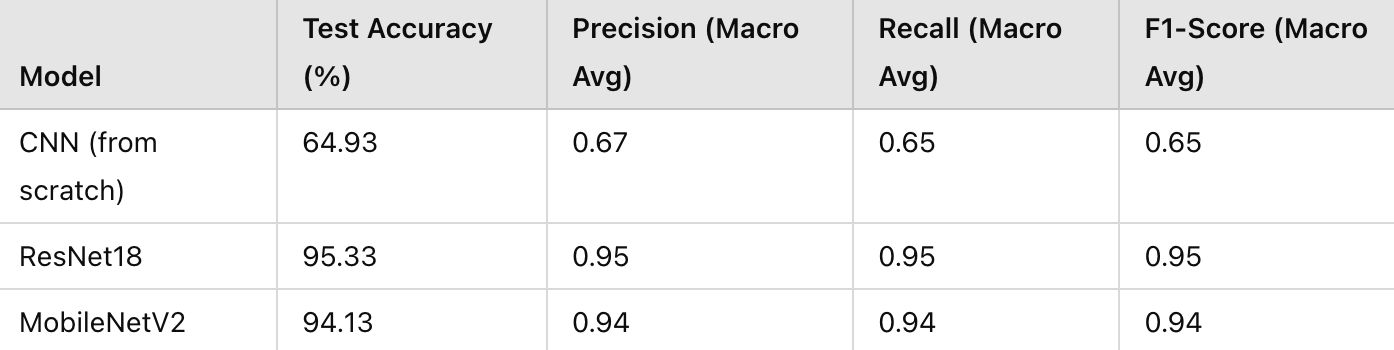

Two methods prominent in deep learning are transfer learning and training from scratch; each has its unique set of advantages and disadvantages. In this problem, transfer learning would employ models such as ResNet18 and MobileNetV2 that have been previously trained on vast amounts of data using datasets like ImageNet. These approaches will save enormous time in training and significant computation because the model already has knowledge of how to extract useful features from the image. For instance, in this work, ResNet18 performed the best with an accuracy of 96.93%, outperforming others in precision, recall, and F1-score. It was closely followed by MobileNetV2, which had an accuracy of 95.33%. This model is very lightweight and, therefore, can be used in environments where computational power is limited, such as mobile or embedded systems. These models excel because they benefit from their robust feature extraction capabilities honed during their extensive pre-training on diverse datasets.

In contrast, although training a CNN from scratch offers the most flexibility and allows customization for specific datasets, it is very resource-intensive and less effective when the dataset is small. This assignment achieved a significantly lower accuracy of 65% with the CNN model trained from scratch, struggling to generalize and classify images effectively. This is because training from scratch requires a larger dataset and longer training time to learn useful features, as the model starts with random weights and no prior knowledge. Despite its disadvantages, training a model from scratch provides valuable insights into the fundamentals of deep learning, making it a good learning exercise for students.

The decision of using transfer learning or training from scratch in practice depends on a lot of factors like dataset size, computational resources, and application requirements. For example, if the need for high accuracy and reliability exists, and if computational resources are sufficient, ResNet18 can be one of the best choices since it has a deep architecture with well-established performance. For applications that demand lightweight and efficient models, like mobile or edge devices, MobileNetV2 strikes a good balance between accuracy and efficiency. However, if the dataset is highly unique and deviates significantly from pre-trained datasets like ImageNet, it may be necessary to train from scratch, although this will require more computational resources and larger datasets. Ultimately, transfer learning is often the preferred approach in real-world scenarios due to its ability to deliver high performance with minimal training time and resources.